In [150]:
# 기본 라이브러리
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
mpl.rc('font',family= 'Malgun Gothic')

In [151]:
df1 = pd.read_csv('Product_data.csv')
df2 = pd.read_csv('Member_data02.csv')
df3 = pd.read_csv('Sales_data02.csv')

C:\Users\DMCCONET\AppData\Local\Temp\ipykernel_16836\4117641066.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('Sales_data02.csv')


In [3]:
# 데이터 확인
df1.info()
df2.dropna(how='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3048 entries, 0 to 3047
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   물품대분류   3048 non-null   object
 1   상품명     3048 non-null   object
 2   물품판매량   3048 non-null   int64 
 3   제품단가    3048 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 95.4+ KB


ID 성별 결혼유무 거주지역    연령 결제등록카드    유입경로 자녀여부
0      2.018123e+14  여   기혼   인천  37.0   국민은행   인스타그램  Yes
1      2.018123e+14  여   기혼   제주  33.0   국민은행    검색광고  Yes
2      2.018123e+14  여   기혼   부산  32.0   하나은행  네이버블로그  Yes
3      2.018123e+14  여   미혼   경남  34.0   기업은행    지인추천   No
4      2.018123e+14  여   기혼   서울  32.0   신한은행    직접검색  Yes
...             ... ..  ...  ...   ...    ...     ...  ...
81089  2.019123e+14  여   기혼   경기  31.0   국민은행    오픈마켓  Yes
81090  2.019123e+14  여   기혼   경남  37.0   롯데카드    오픈마켓  Yes
81091  2.019123e+14  여   기혼   충북  26.0   삼성카드    검색광고  Yes
81092  2.019123e+14  여   기혼   경기  32.0  새마을금고   인스타그램  Yes
81093  2.019123e+14  여   기혼   서울  35.0  새마을금고   인스타그램  Yes

[81094 rows x 8 columns]

# 연령대별 유입경로 비교

In [4]:
df2['연령'].unique()

array([37., 33., 32., 34., 26., 35., 36., 28., 31., 29., 30., 39., 38.,
       27., 40., 25., 41., 42., 22., 43., 24., 23., 44., 45., 46., 20.,
       21., nan])

In [5]:
# 연령대로 나누기
def func1(row):
    if row >= 40:
        return '40대'
    elif row >= 30:
        return '30대'
    elif row >= 20:
        return '20대'
    else:
        return 

df2['연령대'] = df2['연령'].apply(func1)
df2['연령대']

0         30대
1         30대
2         30대
3         30대
4         30대
         ... 
81355    None
81356    None
81357    None
81358    None
81359    None
Name: 연령대, Length: 81360, dtype: object

In [6]:
df2['연령대'].isnull().sum()
df2_a = df2['연령대'].dropna()

In [7]:
df2_a.value_counts()

30대    69691
20대    10506
40대      897
Name: 연령대, dtype: int64

In [8]:
df2_a_cross = pd.crosstab(df2_a,df2['유입경로'])
df2_a_cross

유입경로  검색광고  네이버블로그  네이버카페  매장쿠폰  오픈마켓  이마트  인스타그램  지인추천  직접검색  페이스북
연령대                                                                
20대   1043    2988    755    59   262   31   4023  1055   130   160
30대   7120   19466   4899   393  1729  185  26808  6872   989  1230
40대     96     230     71     4    31    2    336    94    18    15

In [9]:
stats.chi2_contingency(df2_a_cross)

(17.355627235638757,
 0.49879569036696436,
 18,
 array([[1.06998118e+03, 2.93878837e+03, 7.41692974e+02, 5.90763312e+01,
         2.61956890e+02, 2.82426320e+01, 4.03778950e+03, 1.03914748e+03,
         1.47302168e+02, 1.82022468e+02],
        [7.09766406e+03, 1.94942985e+04, 4.91998144e+03, 3.91879744e+02,
         1.73767729e+03, 1.87346018e+02, 2.67844649e+04, 6.89313033e+03,
         9.77121205e+02, 1.20743649e+03],
        [9.13547611e+01, 2.50913113e+02, 6.33255851e+01, 5.04392433e+00,
         2.23658224e+01, 2.41134979e+00, 3.44745592e+02, 8.87221866e+01,
         1.25766271e+01, 1.55410388e+01]]))

In [60]:
a1 = df2['연령대'] == '20대'
a2 = df2['연령대'] == '30대'
a3 = df2['연령대'] == '40대'

In [11]:
df2.loc[a1]['유입경로'].value_counts() # 20대 유입경로 순위

인스타그램     4023
네이버블로그    2988
지인추천      1055
검색광고      1043
네이버카페      755
오픈마켓       262
페이스북       160
직접검색       130
매장쿠폰        59
이마트         31
Name: 유입경로, dtype: int64

In [12]:
df2.loc[a2]['유입경로'].value_counts() # 30대 유입경로 순위

인스타그램     26808
네이버블로그    19466
검색광고       7120
지인추천       6872
네이버카페      4899
오픈마켓       1729
페이스북       1230
직접검색        989
매장쿠폰        393
이마트         185
Name: 유입경로, dtype: int64

In [13]:
df2.loc[a3]['유입경로'].value_counts() # 40대 유입경로 순위

인스타그램     336
네이버블로그    230
검색광고       96
지인추천       94
네이버카페      71
오픈마켓       31
직접검색       18
페이스북       15
매장쿠폰        4
이마트         2
Name: 유입경로, dtype: int64

1. 30대 데이터가 가장 많음
2. 인스타그램 유입률이 가장 높음
3. 2,3,40대 모두 비슷한 유입경로의 비율을 보임

# 월령결측치이상치정리및인기제품과브랜드
### 이상치 제거 | 대체
1. 이상치들은 삭제 후 상품명에 따라 월령을 설정할 예정
    - 상품명에 따른 월령의 최빈값이 필요
2. 구매한 상품명이 유아용품이 아닌 브랜드(좋은느낌, 화이트, 라네이처)인 것은 월령을 None으로 설정
    - 데이터 정제에 브랜드가 활용되어 상품명을 통한 브랜드 지정 과정이 필요

<AxesSubplot:>

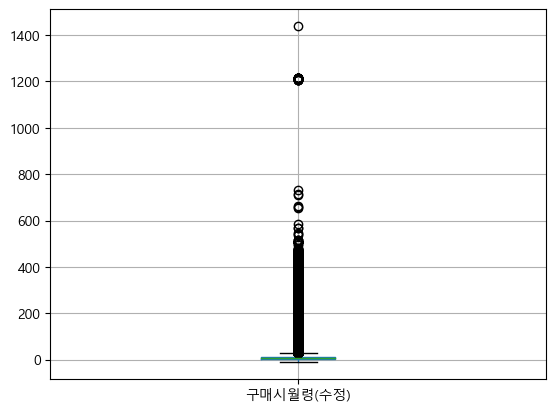

In [14]:
df3.boxplot(column='구매시월령(수정)')
# 월령에 대한 이상치 해결이 필요함

In [15]:
df1['물품대분류'].unique()

array(['FC', 'FMC', 'SKC', 'SrC', '기저귀', '기타', '더블하트', '물티슈', '체험팩', '팬티'],
      dtype=object)

In [16]:
cond1 = (df1['물품대분류']=='FC')
df1.loc[cond1]

물품대분류                               상품명  물품판매량   제품단가
0      FC        (1+1) 좋은느낌 입는 오버나이트 대형 8개입     15      0
1      FC        (1+1) 좋은느낌 입는 오버나이트 중형 8개입     10      0
2      FC  (1+1) 화이트 입는 오버나이트 대형 L 8개입 (EA)     27      0
3      FC  (1+1) 화이트 입는 오버나이트 중형 M 8개입 (EA)     12      0
4      FC   (핫딜위크/1+1) 좋은느낌 입는 오버나이트 대형 8개입      4      0
..    ...                               ...    ...    ...
250    FC               화이트 탐폰 오가닉 레귤러 14개입      6  14000
251    FC                화이트 탐폰 오가닉 슈퍼 14개입      6  14000
252    FC            화이트 한듯안한듯 팬티라이너 롱 36개입     28   6750
253    FC       화이트 한듯안한듯 팬티라이너 롱 36개입 (EA)     11   5523
254    FC         화이트 한듯안한듯 팬티라이너 롱 36개입 X3      3  19500

[255 rows x 4 columns]

In [17]:
cond1 = (df1['물품대분류']=='FMC')
df1.loc[cond1]

물품대분류                                                상품명  물품판매량   제품단가
255   FMC  (1+1) 크리넥스 버블버블 핸드워시 그린향 거품펌프형 250ml + 용기형리필 2...     30      0
256   FMC  (1+1) 크리넥스 버블버블 핸드워시 상큼향 거품펌프형 250ml + 용기형리필 2...     17      0
257   FMC                            (핫딜위크/1+1) 스카트 주방 위생 세트     12      0
258   FMC               (핫딜위크/1+1) 크리넥스 칼로리라이트 키친타월 55매 X 3롤      6      0
259   FMC              [1+1] 스카트 항균 프레쉬블루 빨아쓰는 행주타월 45매 X 4롤     30  24800
..    ...                                                ...    ...    ...
475   FMC                           크리넥스 황사마스크 뉴디자인플러스 대형 3P    209  11866
476   FMC                           크리넥스 황사마스크 뉴디자인플러스 소형 3P    309  16037
477   FMC                             크리넥스 황사용 마스크 플러스 대형10P    222  19871
478   FMC                                        크리넥스/스카트 세트     54  38100
479   FMC                             크리넥스？키즈용？화장지？3겹？27m 8롤    450   8864

[225 rows x 4 columns]

In [18]:
cond1 = (df1['물품대분류']=='SKC')
df1.loc[cond1]

물품대분류                                       상품명  물품판매량   제품단가
480   SKC            [2018년 신제품]그린핑거 인텐시브 투명 선밤 15g     10  19600
481   SKC           [2018년 신제품]그린핑거 퓨어 클렌징 워터 200ml      5  19642
482   SKC        [2020년 3월 신제품] 그린핑거 손 소독제 겔 350 ml     26  15166
483   SKC   [2020년 3월 신제품] 그린핑거 손 소독제 겔 350 ml (EA)      6  13987
484   SKC  [2020년 3월 신제품] 그린핑거 자두야에디션 손 소독제 겔 350ml     20  17172
..    ...                                       ...    ...    ...
634   SKC                 그린핑거 힘센보습 울트라크림 300g (EA)     33  14600
635   SKC                  그린핑거 힘센보습 울트라크림 300g X 2     53  34868
636   SKC               티엔 AC 매끈 진정 시트 마스크(7매) (EA)      1   9920
637   SKC                   티엔 촉촉 클렌징 티슈 (30매) (EA)      1   9000
638   SKC                    티엔 촉촉 클렌징 폼 100ml (EA)      2   9450

[159 rows x 4 columns]

In [19]:
cond1 = (df1['물품대분류']=='SrC')
df1.loc[cond1]

물품대분류                        상품명  물품판매량   제품단가
639   SrC      디펜드 맘스 안심 팬티 8개입 (EA)      3  10200
640   SrC      디펜드 맘스 안심패드 30개입 (EA)      7   7830
641   SrC  디펜드 스타일 라이너 여성용 무향 롱 168매      2  18780
642   SrC      디펜드 안심케어 매직테이프 대형 80매      1  57600
643   SrC      디펜드 안심플러스 언더웨어 중형 54매      1  46900

In [20]:
df1['판매이익']=df1['물품판매량']*df1['제품단가']

In [21]:
p1 = df1.pivot_table(index='물품대분류', values='판매이익', aggfunc='sum')
p1.sort_values(by='판매이익', ascending=False)

판매이익
물품대분류            
기저귀    2230893866
팬티     1731031449
더블하트    916780231
FMC     407062436
체험팩     209257455
SKC     182803724
물티슈     171755360
FC      132365811
기타      132198522
SrC        227470

In [22]:
cond1 = (df1['물품대분류']=='팬티')
df1.loc[cond1]

물품대분류                                        상품명  물품판매량    제품단가     판매이익
2664    팬티  [9/9발송예약판매] 2020 하기스 매직팬티 컴포트 4단계 남아 132매      8   66800   534400
2665    팬티  [9/9발송예약판매] 2020 하기스 매직팬티 컴포트 4단계 여아 132매      4  100200   400800
2666    팬티        [2019년형] 하기스 물놀이팬티 3단계 공용 10매 (팬티형)    166   12877  2137582
2667    팬티   [2019년형] 하기스 물놀이팬티 3단계 공용 10매 (팬티형) (EA)     28   12294   344232
2668    팬티        [2019년형] 하기스 물놀이팬티 4단계 공용 10매 (팬티형)    141   13387  1887567
...    ...                                        ...    ...     ...      ...
3043    팬티             하기스 에어솔솔 썸머팬티 6단계 여아용 68매(팬티형)      4   47360   189440
3044    팬티               하기스 에어솔솔 팬티 4단계 남아용 96매(팬티형)     18   71040  1278720
3045    팬티               하기스 에어솔솔 팬티 4단계 여아용 96매(팬티형)     17   66861  1136637
3046    팬티               하기스 에어솔솔 팬티 5단계 남아용 80매(팬티형)     81   68994  5588514
3047    팬티               하기스 에어솔솔 팬티 5단계 여아용 80매(팬티형)     34   76612  2604808

[384 rows x 5 columns]

In [23]:
cond1 = (df1['물품대분류']=='기저귀')
df1.loc[cond1]

물품대분류                                                상품명  물품판매량    제품단가  \
644   기저귀            [9/9발송예약판매] 2020 하기스 매직 컴포트 3단계 공용 180매     18   65200   
645   기저귀            [9/9발송예약판매] 2020 하기스 매직 컴포트 4단계 공용 150매      3   65200   
646   기저귀           [2019년형] 하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형)   1102   53874   
647   기저귀  [2019년형] 하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형) + 물놀이...     20   63140   
648   기저귀           [2019년형] 하기스 에어솔솔 썸머기저귀 4단계 공용 120매(밴드형)    264   57545   
..    ...                                                ...    ...     ...   
863   기저귀  하기스 에어솔솔 썸머기저귀 4단계 공용 120매(밴드형) X 2 + 매직핏팬티4단계...     12  101280   
864   기저귀  하기스 에어솔솔 썸머기저귀 4단계 공용 120매(밴드형) X 2 + 매직핏팬티4단계...      7  101280   
865   기저귀                              하기스 크린베베 순면감촉 대형 216매      2   32900   
866   기저귀                              하기스 크린베베 순면감촉 소형 252매      1   32900   
867   기저귀                              하기스 크린베베 순면감촉 중형 234매      1   32900   

         판매이익  
644   1173600  
645    195600  
646  59369148  
647   1262800  
648  15191880  
..        ...  
863   1215360  
864    708960  
865     65800  
866     32900  
867     32900  

[224 rows x 5 columns]

In [24]:
cond1 = (df1['물품대분류']=='더블하트')
df1.loc[cond1]

물품대분류                                           상품명  물품판매량    제품단가  \
2113  더블하트       (더블하트 모유보관팩 180ml x 25매 증정) 베스트 수유용품 세트      5  138800   
2114  더블하트  [깜짝혜택]젖병트윈팩 240ml(애니멀)+(증정)더블하트 베이비 크림 100ml      6   61200   
2115  더블하트   [깜짝혜택]젖병트윈팩 240ml(애니멀)+(증정)더블하트 젖병 세정제700ml     20   54010   
2116  더블하트           [깜짝혜택]젖병트윈팩 240ml(애니멀)+(증정)더블하트 젖병솔      2   47200   
2117  더블하트      [깜짝혜택]젖병트윈팩 240ml(애니멀)+(증정)쿨링티서 치발기_핑키고래     15   62040   
...    ...                                           ...    ...     ...   
2493  더블하트                 레드투래드 안티더스트 배리어 미스트 55ml (EA)      3   13900   
2494  더블하트                 레드투래드 안티더스트 클렌징 오일 150ml (EA)      2   16600   
2495  더블하트                                   안심 위생 관리 세트      1   67000   
2496  더블하트                                 이유식기 준비 끝! 세트      2   72200   
2497  더블하트                                젖병 깔끔 세척 끝! 세트     16   44300   

         판매이익  
2113   694000  
2114   367200  
2115  1080200  
2116    94400  
2117   930600  
...       ...  
2493    41700  
2494    33200  
2495    67000  
2496   144400  
2497   708800  

[385 rows x 5 columns]

In [25]:
buy = pd.merge(df2, df3, how='inner', left_on='ID', right_on='고객번호')

In [26]:
buy.dropna(how = 'all', inplace = True)

In [27]:
a = buy[['고객번호', '구매일']]
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196608 entries, 0 to 196607
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   고객번호    196608 non-null  object
 1   구매일     196608 non-null  object
dtypes: object(2)
memory usage: 4.5+ MB


In [28]:
a['구매일_dt']=pd.to_datetime(a['구매일'], format='%Y-%m-%d')
a

C:\Users\DMCCONET\AppData\Local\Temp\ipykernel_22408\1131508739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['구매일_dt']=pd.to_datetime(a['구매일'], format='%Y-%m-%d')


고객번호         구매일     구매일_dt
0       201812310749735  2019-05-06 2019-05-06
1       201812310749735  2020-02-20 2020-02-20
2       201812310749770  2019-02-28 2019-02-28
3       201812310749771  2019-05-13 2019-05-13
4       201812310749774  2019-05-10 2019-05-10
...                 ...         ...        ...
196603  201912181051590  2020-02-01 2020-02-01
196604  201912181051590  2020-02-05 2020-02-05
196605  201912181051590  2020-02-11 2020-02-11
196606  201912181051590  2020-03-02 2020-03-02
196607  201912181051594  2019-12-21 2019-12-21

[196608 rows x 3 columns]

In [29]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196608 entries, 0 to 196607
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   고객번호    196608 non-null  object        
 1   구매일     196608 non-null  object        
 2   구매일_dt  196608 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 6.0+ MB


# 최종구매후 경과일 확인 및 누적그래프 만들기

In [30]:
a['구매일_dt'][1] > a['구매일_dt'][2]

True

In [31]:
p = a.pivot_table(index='고객번호', values='구매일_dt', aggfunc='max')
p

구매일_dt
고객번호                      
201812310749735 2020-02-20
201812310749770 2019-02-28
201812310749771 2019-05-13
201812310749774 2019-07-29
201812310749780 2019-01-30
...                    ...
201912181051567 2019-12-19
201912181051577 2019-12-19
201912181051582 2020-05-22
201912181051590 2020-03-02
201912181051594 2019-12-21

[79307 rows x 1 columns]

In [32]:
p['구매일_dt'].max()

Timestamp('2020-08-07 00:00:00')

In [33]:
p['다시돌아와'] = p['구매일_dt'].max() - p['구매일_dt']

In [34]:
p

구매일_dt    다시돌아와
고객번호                               
201812310749735 2020-02-20 169 days
201812310749770 2019-02-28 526 days
201812310749771 2019-05-13 452 days
201812310749774 2019-07-29 375 days
201812310749780 2019-01-30 555 days
...                    ...      ...
201912181051567 2019-12-19 232 days
201912181051577 2019-12-19 232 days
201912181051582 2020-05-22  77 days
201912181051590 2020-03-02 158 days
201912181051594 2019-12-21 230 days

[79307 rows x 2 columns]

In [35]:
p['다시돌아와'] > '720days'

고객번호
201812310749735    False
201812310749770    False
201812310749771    False
201812310749774    False
201812310749780    False
                   ...  
201912181051567    False
201912181051577    False
201912181051582    False
201912181051590    False
201912181051594    False
Name: 다시돌아와, Length: 79307, dtype: bool

In [36]:
(p['다시돌아와'] > '720days').sum()

0

In [37]:
(p['다시돌아와'] > '630days').sum()

0

In [38]:
(p['다시돌아와'] > '540days').sum()

2880

In [39]:
((p['다시돌아와'] > '450days') & (p['다시돌아와'] < '540days')).sum()

11438

In [40]:
((p['다시돌아와'] > '360days') & (p['다시돌아와'] < '450days')).sum()

13463

In [41]:
(p['다시돌아와'] > '450days').sum()

14425

In [42]:
(p['다시돌아와'] > '360days').sum()

27981

In [43]:
(p['다시돌아와'] > '270days').sum()

44832

In [44]:
((p['다시돌아와'] > '270days') & (p['다시돌아와'] < '360days')).sum()

16713

In [45]:
((p['다시돌아와'] > '180days') & (p['다시돌아와'] < '270days')).sum()

13133

In [46]:
(p['다시돌아와'] < '180days').sum()

21137

In [47]:
p['구매일_dt'].max() - p['구매일_dt'].min()

Timedelta('584 days 00:00:00')

# 기혼 미혼에 따라 이탈율에 차이가 있다?
이탈기혼 /전체기혼
이탈미혼 / 전체미혼

In [48]:
buy

ID 성별 결혼유무 거주지역    연령 결제등록카드    유입경로 자녀여부  연령대  \
0       201812310749735.0  여   기혼   인천  37.0   국민은행   인스타그램  Yes  30대   
1       201812310749735.0  여   기혼   인천  37.0   국민은행   인스타그램  Yes  30대   
2       201812310749770.0  여   기혼   제주  33.0   국민은행    검색광고  Yes  30대   
3       201812310749771.0  여   기혼   부산  32.0   하나은행  네이버블로그  Yes  30대   
4       201812310749774.0  여   미혼   경남  34.0   기업은행    지인추천   No  30대   
...                   ... ..  ...  ...   ...    ...     ...  ...  ...   
196603  201912181051590.0  여   미혼   전북  31.0   부산은행  네이버블로그   No  30대   
196604  201912181051590.0  여   미혼   전북  31.0   부산은행  네이버블로그   No  30대   
196605  201912181051590.0  여   미혼   전북  31.0   부산은행  네이버블로그   No  30대   
196606  201912181051590.0  여   미혼   전북  31.0   부산은행  네이버블로그   No  30대   
196607  201912181051594.0  여   기혼   강원  37.0   신한은행  네이버블로그  Yes  30대   

                   주문번호         구매일       배송시작일       배송완료일  구매시월령(수정)  \
0       201905052342970  2019-05-06  2019-05-07  2019-05-11        4.0   
1       202002203424450  2020-02-20  2020-02-21  2020-02-23       14.0   
2       201902282095385  2019-02-28  2019-03-01  2019-03-05        NaN   
3       201905132367003  2019-05-13  2019-05-14  2019-05-16       66.0   
4       201905092356247  2019-05-10  2019-05-11  2019-05-13        5.0   
...                 ...         ...         ...         ...        ...   
196603  202001313357631  2020-02-01  2020-02-02  2020-02-05        NaN   
196604  202002053372744  2020-02-05  2020-02-06  2020-02-09        NaN   
196605  202002113390379  2020-02-11  2020-02-12  2020-02-14        NaN   
196606  202003023476867  2020-03-02  2020-03-03  2020-03-05        NaN   
196607  201912203217037  2019-12-21  2019-12-22  2019-12-24        NaN   

                   고객번호   구매금액   결제금액 물품대분류                               상품명  
0       201812310749735  25800  16314  더블하트     더블하트 SofTouch 모유실감 젖꼭지 M (2입)  
1       201812310749735  51200  37769    팬티  NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형)  
2       201812310749770   5610   3800   FMC            크리넥스？키즈용？화장지？3겹？27m 8롤  
3       201812310749771  59520  47922   기저귀    하기스 네이처메이드 밤부 3단계 여아 144매(밴드형)  
4       201812310749774  50640  39788   기저귀   하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형)  
...                 ...    ...    ...   ...                               ...  
196603  201912181051590   2200   1485   FMC                    크리넥스 코편한티슈 60매  
196604  201912181051590   2090   1811   FMC       크리넥스 여행용티슈 카카오프렌즈 70매 X 3개입  
196605  201912181051590  19900  18513   FMC            크리넥스 3겹 데코앤소프트 27m 30롤  
196606  201912181051590  11700  10187   FMC       크리넥스 안심 클래식 키친타월 140매 X 12롤  
196607  201912181051594   6270   4335   FMC       크리넥스 여행용티슈 카카오프렌즈 70매 X 3개입  

[196608 rows x 19 columns]

In [49]:
buyp = pd.merge(p, buy, how='left', left_on='고객번호', right_on='ID')
buyp.dropna(inplace=True)

buyp

구매일_dt    다시돌아와                 ID 성별 결혼유무 거주지역    연령 결제등록카드  \
0      2020-02-20 169 days  201812310749735.0  여   기혼   인천  37.0   국민은행   
1      2020-02-20 169 days  201812310749735.0  여   기혼   인천  37.0   국민은행   
3      2019-05-13 452 days  201812310749771.0  여   기혼   부산  32.0   하나은행   
4      2019-07-29 375 days  201812310749774.0  여   미혼   경남  34.0   기업은행   
5      2019-07-29 375 days  201812310749774.0  여   미혼   경남  34.0   기업은행   
...           ...      ...                ... ..  ...  ...   ...    ...   
196595 2020-01-27 193 days  201912181051548.0  여   기혼   충남  34.0   광주은행   
196596 2020-01-27 193 days  201912181051548.0  여   기혼   충남  34.0   광주은행   
196597 2019-12-19 232 days  201912181051549.0  여   기혼   경기  33.0  농협중앙회   
196600 2019-12-19 232 days  201912181051577.0  여   기혼   서울  38.0   롯데카드   
196601 2020-05-22  77 days  201912181051582.0  여   미혼   서울  38.0   부산은행   

          유입경로 자녀여부  ...                        주문번호         구매일       배송시작일  \
0        인스타그램  Yes  ...             201905052342970  2019-05-06  2019-05-07   
1        인스타그램  Yes  ...             202002203424450  2020-02-20  2020-02-21   
3       네이버블로그  Yes  ...             201905132367003  2019-05-13  2019-05-14   
4         지인추천   No  ...             201905092356247  2019-05-10  2019-05-11   
5         지인추천   No  ...             201907282649358  2019-07-29  2019-07-30   
...        ...  ...  ...                         ...         ...         ...   
196595   인스타그램  Yes  ...             201912183195240  2019-12-19  2019-12-20   
196596   인스타그램  Yes  ...             202001273336565  2020-01-27  2020-01-28   
196597   인스타그램  Yes  ...             201912183195387  2019-12-19  2019-12-20   
196600   인스타그램  Yes  ...             201912183195335  2019-12-19  2019-12-20   
196601    검색광고   No  ...  20200522093728-77908866813  2020-05-22  2020-05-23   

             배송완료일 구매시월령(수정)             고객번호    구매금액   결제금액  물품대분류  \
0       2019-05-11       4.0  201812310749735   25800  16314   더블하트   
1       2020-02-23      14.0  201812310749735   51200  37769     팬티   
3       2019-05-16      66.0  201812310749771   59520  47922    기저귀   
4       2019-05-13       5.0  201812310749774   50640  39788    기저귀   
5       2019-08-02       8.0  201812310749774  101280  76744    기저귀   
...            ...       ...              ...     ...    ...    ...   
196595  2019-12-23       4.0  201912181051548   12900   8167   더블하트   
196596  2020-01-30       6.0  201912181051548   12900   8820   더블하트   
196597  2019-12-22      46.0  201912181051549   31620  10275    SKC   
196600  2019-12-23      63.0  201912181051577   45000  26100    SKC   
196601  2020-05-25       1.0  201912181051582   25900  14250     팬티   

                                             상품명  
0                  더블하트 SofTouch 모유실감 젖꼭지 M (2입)  
1               NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형)  
3                 하기스 네이처메이드 밤부 3단계 여아 144매(밴드형)  
4                하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형)  
5       [2019년형] 하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형)  
...                                          ...  
196595            더블하트 SofTouch 모유실감 젖꼭지 LL (2입)  
196596            더블하트 SofTouch 모유실감 젖꼭지 LL (2입)  
196597           그린핑거 마이키즈 자두야에디션 핸드워시 프레쉬 300ml  
196600   그린핑거 마이키즈 워시 500ml(대용량) + 샴푸 500ml(대용량)  
196601            하기스 네이처메이드 팬티 3단계 남아 120매(팬티형)  

[165700 rows x 21 columns]

In [50]:
#p['다시돌아와'] < '180days'

buyp = pd.merge(p, buy, how='inner', left_on='고객번호', right_on='ID')
buyp

구매일_dt    다시돌아와                 ID 성별 결혼유무 거주지역    연령 결제등록카드  \
0      2020-02-20 169 days  201812310749735.0  여   기혼   인천  37.0   국민은행   
1      2020-02-20 169 days  201812310749735.0  여   기혼   인천  37.0   국민은행   
2      2019-02-28 526 days  201812310749770.0  여   기혼   제주  33.0   국민은행   
3      2019-05-13 452 days  201812310749771.0  여   기혼   부산  32.0   하나은행   
4      2019-07-29 375 days  201812310749774.0  여   미혼   경남  34.0   기업은행   
...           ...      ...                ... ..  ...  ...   ...    ...   
196603 2020-03-02 158 days  201912181051590.0  여   미혼   전북  31.0   부산은행   
196604 2020-03-02 158 days  201912181051590.0  여   미혼   전북  31.0   부산은행   
196605 2020-03-02 158 days  201912181051590.0  여   미혼   전북  31.0   부산은행   
196606 2020-03-02 158 days  201912181051590.0  여   미혼   전북  31.0   부산은행   
196607 2019-12-21 230 days  201912181051594.0  여   기혼   강원  37.0   신한은행   

          유입경로 자녀여부  ...             주문번호         구매일       배송시작일       배송완료일  \
0        인스타그램  Yes  ...  201905052342970  2019-05-06  2019-05-07  2019-05-11   
1        인스타그램  Yes  ...  202002203424450  2020-02-20  2020-02-21  2020-02-23   
2         검색광고  Yes  ...  201902282095385  2019-02-28  2019-03-01  2019-03-05   
3       네이버블로그  Yes  ...  201905132367003  2019-05-13  2019-05-14  2019-05-16   
4         지인추천   No  ...  201905092356247  2019-05-10  2019-05-11  2019-05-13   
...        ...  ...  ...              ...         ...         ...         ...   
196603  네이버블로그   No  ...  202001313357631  2020-02-01  2020-02-02  2020-02-05   
196604  네이버블로그   No  ...  202002053372744  2020-02-05  2020-02-06  2020-02-09   
196605  네이버블로그   No  ...  202002113390379  2020-02-11  2020-02-12  2020-02-14   
196606  네이버블로그   No  ...  202003023476867  2020-03-02  2020-03-03  2020-03-05   
196607  네이버블로그  Yes  ...  201912203217037  2019-12-21  2019-12-22  2019-12-24   

       구매시월령(수정)             고객번호   구매금액   결제금액  물품대분류  \
0            4.0  201812310749735  25800  16314   더블하트   
1           14.0  201812310749735  51200  37769     팬티   
2            NaN  201812310749770   5610   3800    FMC   
3           66.0  201812310749771  59520  47922    기저귀   
4            5.0  201812310749774  50640  39788    기저귀   
...          ...              ...    ...    ...    ...   
196603       NaN  201912181051590   2200   1485    FMC   
196604       NaN  201912181051590   2090   1811    FMC   
196605       NaN  201912181051590  19900  18513    FMC   
196606       NaN  201912181051590  11700  10187    FMC   
196607       NaN  201912181051594   6270   4335    FMC   

                                     상품명  
0          더블하트 SofTouch 모유실감 젖꼭지 M (2입)  
1       NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형)  
2                 크리넥스？키즈용？화장지？3겹？27m 8롤  
3         하기스 네이처메이드 밤부 3단계 여아 144매(밴드형)  
4        하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형)  
...                                  ...  
196603                    크리넥스 코편한티슈 60매  
196604       크리넥스 여행용티슈 카카오프렌즈 70매 X 3개입  
196605            크리넥스 3겹 데코앤소프트 27m 30롤  
196606       크리넥스 안심 클래식 키친타월 140매 X 12롤  
196607       크리넥스 여행용티슈 카카오프렌즈 70매 X 3개입  

[196608 rows x 21 columns]

In [51]:
cond1 = (buyp['다시돌아와'] > '360days')
cond2 = (buyp['다시돌아와'] < '360days')
buyp.loc[cond1]['결혼유무'].value_counts()

기혼    33083
미혼     6064
Name: 결혼유무, dtype: int64

In [52]:
buyp.loc[cond2]['결혼유무'].value_counts()

기혼    133207
미혼     24051
Name: 결혼유무, dtype: int64

In [53]:
(p['다시돌아와'] > '180days')
buyp.pivot_table(index='결혼유무', values='다시돌아와', aggfunc='count')

다시돌아와
결혼유무        
기혼    166467
미혼     30141

In [54]:
buyp['결혼유무'].value_counts()

기혼    166467
미혼     30141
Name: 결혼유무, dtype: int64

In [55]:
df1.sort_values(by ='판매이익', ascending = False)

물품대분류                                                상품명  물품판매량   제품단가  \
768    기저귀                        하기스 네이처메이드 2단계 여아 156매(밴드형)   3010  64679   
766    기저귀                        하기스 네이처메이드 2단계 남아 156매(밴드형)   2792  65175   
774    기저귀                        하기스 네이처메이드 3단계 여아 132매(밴드형)   2591  64072   
771    기저귀                        하기스 네이처메이드 3단계 남아 132매(밴드형)   2375  63401   
763    기저귀                        하기스 네이처메이드 1단계 공용 186매(밴드형)   1774  61728   
...    ...                                                ...    ...    ...   
2056    기타                2020 하기스 매직 컴포트 5단계 공용 126매(밴드형) X2      1      0   
2806    팬티  NEW 하기스 네이처메이드 팬티 3단계 남아 116매(팬티형) X3 + 보너스 36...      4      0   
2801    팬티                  NEW 하기스 네이처메이드 5단계 여아 92매(밴드형) X3      2      0   
2800    팬티                  NEW 하기스 네이처메이드 5단계 여아 92매(밴드형) X2      2      0   
0       FC                         (1+1) 좋은느낌 입는 오버나이트 대형 8개입     15      0   

           판매이익  
768   194683790  
766   181968600  
774   166010552  
771   150577375  
763   109505472  
...         ...  
2056          0  
2806          0  
2801          0  
2800          0  
0             0  

[3048 rows x 5 columns]

In [56]:
buy['유입경로'].value_counts()

인스타그램     75665
네이버블로그    55704
검색광고      19540
지인추천      19276
네이버카페     13902
오픈마켓       5058
페이스북       3273
직접검색       2668
매장쿠폰        992
이마트         530
Name: 유입경로, dtype: int64

In [57]:
buy.pivot_table(index=['구매시월령(수정)'],
                      values='구매금액'
                  ,aggfunc = 'mean')

구매금액
구매시월령(수정)              
-10.0      21134.102564
-9.0       25645.986395
-8.0       23641.673820
-7.0       13067.663421
-6.0       12386.587302
...                 ...
 1211.0    55500.000000
 1212.0    51050.000000
 1213.0    61666.666667
 1214.0    21828.571429
 1215.0    39820.000000

[483 rows x 1 columns]

# 5.	많이 사용하는 카드사(카드제휴 필요성 예측)

In [58]:
buy['결제등록카드'].value_counts()
# 가장 많이 사용하는 카드 1. 국민 2. 롯데 3. 농협 4.신한 5. 우리

국민은행      26369
롯데카드      26215
농협회원조합    22246
신한은행      21543
농협중앙회     18916
우리은행      17598
국민카드       8468
신한카드       8236
BC카드       6576
하나은행       6401
기업은행       6016
현대카드       5276
삼성카드       4014
부산은행       3461
새마을금고      3150
광주은행       2834
SC제일은행     1963
씨티은행       1724
우체국        1467
대구은행       1098
외환은행       1094
신협중앙회       921
경남은행        521
미래에셋증권      501
Name: 결제등록카드, dtype: int64

# 6.	결혼여부에 따른 구매품목 분석(만약에 미혼인데도 불구하고 유아용품을 많이?산다 -> 이에대한 분석 )
1. 연령대별 결혼 여부에 따른 유아용품 구매비율
2. 결혼 여부에 따른 구매품목 분석

In [63]:
#df1
buy

ID 성별 결혼유무 거주지역    연령 결제등록카드    유입경로 자녀여부  연령대  \
0       201812310749735.0  여   기혼   인천  37.0   국민은행   인스타그램  Yes  30대   
1       201812310749735.0  여   기혼   인천  37.0   국민은행   인스타그램  Yes  30대   
2       201812310749770.0  여   기혼   제주  33.0   국민은행    검색광고  Yes  30대   
3       201812310749771.0  여   기혼   부산  32.0   하나은행  네이버블로그  Yes  30대   
4       201812310749774.0  여   미혼   경남  34.0   기업은행    지인추천   No  30대   
...                   ... ..  ...  ...   ...    ...     ...  ...  ...   
196603  201912181051590.0  여   미혼   전북  31.0   부산은행  네이버블로그   No  30대   
196604  201912181051590.0  여   미혼   전북  31.0   부산은행  네이버블로그   No  30대   
196605  201912181051590.0  여   미혼   전북  31.0   부산은행  네이버블로그   No  30대   
196606  201912181051590.0  여   미혼   전북  31.0   부산은행  네이버블로그   No  30대   
196607  201912181051594.0  여   기혼   강원  37.0   신한은행  네이버블로그  Yes  30대   

                   주문번호         구매일       배송시작일       배송완료일  구매시월령(수정)  \
0       201905052342970  2019-05-06  2019-05-07  2019-05-11        4.0   
1       202002203424450  2020-02-20  2020-02-21  2020-02-23       14.0   
2       201902282095385  2019-02-28  2019-03-01  2019-03-05        NaN   
3       201905132367003  2019-05-13  2019-05-14  2019-05-16       66.0   
4       201905092356247  2019-05-10  2019-05-11  2019-05-13        5.0   
...                 ...         ...         ...         ...        ...   
196603  202001313357631  2020-02-01  2020-02-02  2020-02-05        NaN   
196604  202002053372744  2020-02-05  2020-02-06  2020-02-09        NaN   
196605  202002113390379  2020-02-11  2020-02-12  2020-02-14        NaN   
196606  202003023476867  2020-03-02  2020-03-03  2020-03-05        NaN   
196607  201912203217037  2019-12-21  2019-12-22  2019-12-24        NaN   

                   고객번호   구매금액   결제금액 물품대분류                               상품명  
0       201812310749735  25800  16314  더블하트     더블하트 SofTouch 모유실감 젖꼭지 M (2입)  
1       201812310749735  51200  37769    팬티  NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형)  
2       201812310749770   5610   3800   FMC            크리넥스？키즈용？화장지？3겹？27m 8롤  
3       201812310749771  59520  47922   기저귀    하기스 네이처메이드 밤부 3단계 여아 144매(밴드형)  
4       201812310749774  50640  39788   기저귀   하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형)  
...                 ...    ...    ...   ...                               ...  
196603  201912181051590   2200   1485   FMC                    크리넥스 코편한티슈 60매  
196604  201912181051590   2090   1811   FMC       크리넥스 여행용티슈 카카오프렌즈 70매 X 3개입  
196605  201912181051590  19900  18513   FMC            크리넥스 3겹 데코앤소프트 27m 30롤  
196606  201912181051590  11700  10187   FMC       크리넥스 안심 클래식 키친타월 140매 X 12롤  
196607  201912181051594   6270   4335   FMC       크리넥스 여행용티슈 카카오프렌즈 70매 X 3개입  

[196608 rows x 19 columns]

In [64]:
unmarried = buy['결혼유무'] == '미혼'
married = buy['결혼유무'] == '기혼'

In [65]:
buy['결혼유무'].value_counts()

기혼    166467
미혼     30141
Name: 결혼유무, dtype: int64

In [66]:
unmarried.value_counts()

False    166467
True      30141
Name: 결혼유무, dtype: int64

In [67]:
buy.pivot_table(index='결혼유무',values = '구매금액',
                      aggfunc = 'mean')
# 미혼자의 구매금액이 높다

구매금액
결혼유무              
기혼    30595.240198
미혼    30704.592747

In [68]:
stats.normaltest(buy.loc[unmarried]['구매금액'])
# 정규분포 아님

NormaltestResult(statistic=16286.69337491205, pvalue=0.0)

In [69]:
stats.normaltest(buy.loc[married]['구매금액'])
# 정규분포 아님

NormaltestResult(statistic=66887.1396087796, pvalue=0.0)

In [70]:
stats.ranksums(buy.loc[unmarried]['구매금액'], buy.loc[married]['구매금액'])
# P.value >0.05 두 집단간의 평균의 차이가 없다.

RanksumsResult(statistic=-0.47466885380857293, pvalue=0.635023021175581)

In [71]:
# 미혼 고객 구매량 분석(기혼고객대비)

In [72]:
buy.loc[unmarried]['물품대분류'].value_counts()
# 미혼임에도 불구하고 유아용품 구매비중이 높다.

더블하트    5608
체험팩     5423
기저귀     5340
팬티      4125
FMC     3933
FC      1846
SKC     1433
물티슈     1258
기타      1174
SrC        1
Name: 물품대분류, dtype: int64

In [73]:
buy.loc[married]['물품대분류'].value_counts()

더블하트    31126
기저귀     29450
체험팩     29379
팬티      23114
FMC     21602
FC      10335
SKC      7781
물티슈      7094
기타       6573
SrC        13
Name: 물품대분류, dtype: int64

In [74]:
buy['성별'].value_counts()

여    190425
남      6183
Name: 성별, dtype: int64

In [75]:
man = (buy['성별']=='남')
m1 = buy.loc[man]
m1['결혼유무'].value_counts()

기혼    5179
미혼    1004
Name: 결혼유무, dtype: int64

In [76]:
woman = (buy['성별']=='여')
w1 = buy.loc[woman]
w1['결혼유무'].value_counts()

기혼    161288
미혼     29137
Name: 결혼유무, dtype: int64

In [77]:
# 결혼 유무에 따른 구매금액 중, 구매금액 상위권 확인

In [78]:
#m1.sort_values(by ='구매금액', ascending = False)
p1 = buy.loc[unmarried].sort_values(by ='구매금액', ascending = False).head(100)
p1['성별'].value_counts()

여    96
남     4
Name: 성별, dtype: int64

In [79]:
p2 = buy.loc[married].sort_values(by ='구매금액', ascending = False).head(100)
p2['성별'].value_counts()

여    98
남     2
Name: 성별, dtype: int64

# 결혼여부에 따른 구매금액의 평균차이 검정

In [80]:
buy.loc[unmarried].pivot_table(index='성별', values='구매금액', aggfunc='mean')
#미혼 남 여 구매금액 평균차이

구매금액
성별              
남   32147.679283
여   30654.867008

In [81]:
buy.loc[married].pivot_table(index='성별', values='구매금액', aggfunc='mean')

#기혼 남 여 구매금액 평균차이

구매금액
성별              
남   30690.278046
여   30592.188508

In [82]:
t1 = buy.loc[unmarried]['구매금액']
t2 = buy.loc[married]['구매금액']
stats.normaltest(t1)

NormaltestResult(statistic=16286.69337491205, pvalue=0.0)

In [83]:
stats.normaltest(t2)

NormaltestResult(statistic=66887.1396087796, pvalue=0.0)

In [84]:
stats.ranksums(t1,t2)
# P.value >0.05 귀무가설 참 두 집단의 평균의 차이가 없다.

RanksumsResult(statistic=-0.47466885380857293, pvalue=0.635023021175581)

In [85]:
# 성별에 따른 구매금액과 연령대에 따른 결혼유무

In [86]:
s1 = buy.loc[woman]['구매금액'].describe()
round(s1,0)
#s1

count    190425.0
mean      30602.0
std       30552.0
min           0.0
25%        7400.0
50%       17500.0
75%       51200.0
max      598000.0
Name: 구매금액, dtype: float64

In [87]:
s2 = buy.loc[man]['구매금액'].describe()
round(s2,0)
#s1

count      6183.0
mean      30927.0
std       31256.0
min           0.0
25%        7350.0
50%       17800.0
75%       51200.0
max      312000.0
Name: 구매금액, dtype: float64

In [97]:
#연령대별 결혼비율
a1 = buy['연령대'] == '20대'
a2 = buy['연령대'] == '30대'
a3 = buy['연령대'] == '40대'

In [98]:
twenty = (buy.loc[a1]) #20대 df
thirty = (buy.loc[a2]) #30대
forty = (buy.loc[a3]) #40대

In [99]:
twenty['결혼유무'].value_counts()

기혼    21111
미혼     3859
Name: 결혼유무, dtype: int64

In [100]:
thirty['결혼유무'].value_counts()

기혼    143472
미혼     25869
Name: 결혼유무, dtype: int64

In [101]:
forty['결혼유무'].value_counts()

기혼    1884
미혼     413
Name: 결혼유무, dtype: int64

### 구매자 30대 기혼비율5.54 > 20대 기혼비율5.47 > 40대 기혼비율4.56

In [102]:
pd.crosstab(buy['연령대'],buy['물품대분류'])

물품대분류     FC    FMC   SKC  SrC    기저귀    기타   더블하트   물티슈    체험팩     팬티
연령대                                                                   
20대     1489   3297  1148    0   4445   888   4779  1036   4467   3421
30대    10537  21948  7962   13  29916  6752  31535  7213  29951  23514
40대      155    290   104    1    429   107    420   103    384    304

# 물품대분류에 따른 구매금액

In [103]:
df1 # 물품대분류
df3 # 구매금액
# 두 데이터셋 merge
df1

물품대분류                               상품명  물품판매량   제품단가     판매이익
0       FC        (1+1) 좋은느낌 입는 오버나이트 대형 8개입     15      0        0
1       FC        (1+1) 좋은느낌 입는 오버나이트 중형 8개입     10      0        0
2       FC  (1+1) 화이트 입는 오버나이트 대형 L 8개입 (EA)     27      0        0
3       FC  (1+1) 화이트 입는 오버나이트 중형 M 8개입 (EA)     12      0        0
4       FC   (핫딜위크/1+1) 좋은느낌 입는 오버나이트 대형 8개입      4      0        0
...    ...                               ...    ...    ...      ...
3043    팬티    하기스 에어솔솔 썸머팬티 6단계 여아용 68매(팬티형)      4  47360   189440
3044    팬티      하기스 에어솔솔 팬티 4단계 남아용 96매(팬티형)     18  71040  1278720
3045    팬티      하기스 에어솔솔 팬티 4단계 여아용 96매(팬티형)     17  66861  1136637
3046    팬티      하기스 에어솔솔 팬티 5단계 남아용 80매(팬티형)     81  68994  5588514
3047    팬티      하기스 에어솔솔 팬티 5단계 여아용 80매(팬티형)     34  76612  2604808

[3048 rows x 5 columns]

In [104]:
df13 = pd.merge(df1, df3, how='inner', on='상품명')
df13

물품대분류_x                           상품명  물품판매량   제품단가     판매이익  \
0           FC    (1+1) 좋은느낌 입는 오버나이트 대형 8개입     15      0        0   
1           FC    (1+1) 좋은느낌 입는 오버나이트 대형 8개입     15      0        0   
2           FC    (1+1) 좋은느낌 입는 오버나이트 대형 8개입     15      0        0   
3           FC    (1+1) 좋은느낌 입는 오버나이트 대형 8개입     15      0        0   
4           FC    (1+1) 좋은느낌 입는 오버나이트 대형 8개입     15      0        0   
...        ...                           ...    ...    ...      ...   
210034      팬티  하기스 에어솔솔 팬티 5단계 여아용 80매(팬티형)     34  76612  2604808   
210035      팬티  하기스 에어솔솔 팬티 5단계 여아용 80매(팬티형)     34  76612  2604808   
210036      팬티  하기스 에어솔솔 팬티 5단계 여아용 80매(팬티형)     34  76612  2604808   
210037      팬티  하기스 에어솔솔 팬티 5단계 여아용 80매(팬티형)     34  76612  2604808   
210038      팬티  하기스 에어솔솔 팬티 5단계 여아용 80매(팬티형)     34  76612  2604808   

                              주문번호         구매일       배송시작일       배송완료일  \
0       20200708215604-24816718627  2020-07-09  2020-07-10  2020-07-12   
1       20200705183955-53809578132  2020-07-06  2020-07-07  2020-07-10   
2       20200705114301-24010910859  2020-07-05  2020-07-06  2020-07-10   
3       20200730222305-15166327117  2020-07-31  2020-08-01  2020-08-05   
4       20200720112019-97460622613  2020-07-20  2020-07-21  2020-07-23   
...                            ...         ...         ...         ...   
210034             201904222303404  2019-04-22  2019-04-23  2019-04-26   
210035             201905142370342  2019-05-14  2019-05-15  2019-05-17   
210036             201904222302638  2019-04-22  2019-04-23  2019-04-26   
210037             201905062345213  2019-05-07  2019-05-08  2019-05-10   
210038             201905072348742  2019-05-07  2019-05-08  2019-05-10   

        구매시월령(수정)             고객번호    구매금액   결제금액 물품대분류_y  
0           204.0  201901210770285       0      0      FC  
1             NaN  201902240812479       0      0      FC  
2            15.0  201902260814348       0      0      FC  
3            27.0  201903020822021       0      0      FC  
4            14.0  201903040823792       0      0      FC  
...           ...              ...     ...    ...     ...  
210034       39.0  201904190875278   47360  32682      팬티  
210035        NaN  201904200876103   94720  58714      팬티  
210036       26.0  201904220877285  142080  98046      팬티  
210037       24.0  201905060886104   94720  65364      팬티  
210038       20.0  201905070886713   47360  34642      팬티  

[210039 rows x 14 columns]

In [105]:
df13.isnull().sum()

물품대분류_x          0
상품명              0
물품판매량            0
제품단가             0
판매이익             0
주문번호             0
구매일              0
배송시작일            0
배송완료일            0
구매시월령(수정)    32933
고객번호             0
구매금액             0
결제금액             0
물품대분류_y          0
dtype: int64

In [106]:
# 물품 대분류별 구매금액
df3['물품대분류'].unique()

array(['더블하트', '팬티', 'FMC', '기저귀', '체험팩', 'FC', '기타', '물티슈', 'SKC', 'SrC'],
      dtype=object)

거의 다 유아용품, 유아용품과 그 외로 나누어 분리해서 보려고 했으나 유아용품이 월등히 판매비율이 높아서 이 이상 분석 안함

## 성별에 따라 유입경로가 달라진다.

In [107]:
# 인스타그램과 네이버 뺴고 분석
buy_crossx = buy_cross.drop(['네이버블로그', '네이버카페','인스타그램'],axis = 1)
buy_crossx

NameError: name 'buy_cross' is not defined

In [108]:
stats.chi2_contingency(buy_crossx)

NameError: name 'buy_crossx' is not defined

In [109]:
# 인스타 네이버 포함해서
buy_cross = pd.crosstab(buy['성별'],buy['유입경로'])
buy_cross

유입경로   검색광고  네이버블로그  네이버카페  매장쿠폰  오픈마켓  이마트  인스타그램   지인추천  직접검색  페이스북
성별                                                                   
남       596    1719    475    17   178   21   2506    566    46    59
여     18944   53985  13427   975  4880  509  73159  18710  2622  3214

In [110]:
stats.chi2_contingency(buy_cross)
# chi2 통계량 / P.value /자유도 / 기댓값
# P.value <0.05 /대립가설 참 / 연관성이 있다.-> 성별에 따라 유입경로가 달라진다.

(61.473066622937054,
 6.967062494525752e-10,
 9,
 array([[6.14501038e+02, 1.75179968e+03, 4.37195160e+02, 3.11967773e+01,
         1.59065826e+02, 1.66676331e+01, 2.37954048e+03, 6.06198669e+02,
         8.39042358e+01, 1.02930496e+02],
        [1.89254990e+04, 5.39522003e+04, 1.34648048e+04, 9.60803223e+02,
         4.89893417e+03, 5.13332367e+02, 7.32854595e+04, 1.86698013e+04,
         2.58409576e+03, 3.17006950e+03]]))

In [111]:
# 결혼유무와 연령대 카이제곱검정
buy_cross2 = pd.crosstab(buy['결혼유무'],buy['연령대'])
buy_cross2

연령대     20대     30대   40대
결혼유무                     
기혼    21111  143472  1884
미혼     3859   25869   413

In [112]:
stats.chi2_contingency(buy_cross2) 
# P.value< 0.05 연령대와 결혼유무간 차이가 있다.

(13.101728469695873,
 0.0014288801764954257,
 2,
 array([[ 21141.97280884, 143380.16889954,   1944.85829163],
        [  3828.02719116,  25960.83110046,    352.14170837]]))

## 상품별 브랜드 지정 - df1 사용

In [113]:
brand_list = ['하기스', '그린핑거', '굿나이트', '좋은느낌', '화이트', '라네이처',
              '크리넥스', '스카트', '디펜드', '유한양행', '티엔', '맘큐', '닥터마밍', 
              '드시모네', '릴리유', '핑크퐁', '메이브리즈', '더블하트', '레드투래드', 
              '꿈비', '먼치킨', '리틀누', '룰라러브', '브라이트스타트', '맘마밀', 
              '매일우유', '메릴린', '뿌띠슈', '몽슈레', '순수담다', '무무브', '에불로보',
              '스와들디자인', '베이비머핀', '시크릿쥬쥬', '베이비아인슈타인', '바디빔', 
              '바오밥성장그림', '신비아파트', '보니타베베', '보보앤부', '실리만', '보쉬토이', 
              '본토이', '브리카', '아이엠스페셜', '아이스크림페어리', '비박스', '비더마틱', 
              '비츠', '뽀드미엘', '쁘띠베베', '산골간식', '엘트라', '오볼', '상하목장', 
              '상하치즈', '율그란', '스와들업', '크로텍', '키썸플레이', '씨알로', '테스', 
              '야마토야', '에르고베이비', '필리앤임프스', '엘비니', '캐스돈', '엔픽스', 
              '요미요미', '올라베이비', '탑브라이트', '킨더초콜릿', '콱스', '캐시크루즈', 
              '카가앤푸치', '젤리맘', '윈펀', '레고', '리틀마마', '릴라스틸', '마더니아', 
              '마이포코리아', '맘스앱솔루트', '매직캔','메가블럭', '믹스드페어스', 
              '아이헤이트먼데이', '에르고파우치', '립톤', '바세린', '도담도담오가닉', 
              '디어에코', '디즈니베이비', '라그랑', '누들앤부', '너프', '누텔라', '뉴나', 
              '뉴오리진', '데르뜨', '라밀로우', '라인프렌즈', '트루자임', '페레로로쉐',
              '퓨리티', '플레이도', '피에스타', '해밀턴', 'Go-MINI', '도브', '트레제메', '조이']

def brand(df):
    for brand_name in brand_list:
        if (brand_name in df):
            a = brand_name
            break
        else:
            a = '기타'
    return a
            
        
buy['브랜드'] = buy['상품명'].apply(brand)

In [114]:
buy['브랜드'].unique()

array(['더블하트', '하기스', '크리넥스', '디펜드', '필리앤임프스', '스카트', '릴리유', '화이트', '맘큐',
       '닥터마밍', '상하목장', '도담도담오가닉', '좋은느낌', '그린핑거', '먼치킨', '브라이트스타트', '기타',
       '브리카', '실리만', '테스', '라네이처', '도브', '캐스돈', '산골간식', '립톤', '티엔',
       '리틀마마', '상하치즈', '드시모네', '아이엠스페셜', '굿나이트', '율그란', '매일우유', '본토이',
       '요미요미', '트레제메', '오볼', '아이스크림페어리', '디즈니베이비', '에르고베이비', '메릴린',
       '에불로보', '핑크퐁', '보보앤부', '보쉬토이', '탑브라이트', 'Go-MINI', '뿌띠슈', '카가앤푸치',
       '씨알로', '캐시크루즈', '룰라러브', '엘비니', '라인프렌즈', '순수담다', '누텔라', '올라베이비',
       '야마토야', '킨더초콜릿', '누들앤부', '뽀드미엘', '뉴오리진', '라그랑', '매직캔', '시크릿쥬쥬',
       '맘스앱솔루트', '너프', '신비아파트', '베이비아인슈타인', '믹스드페어스', '스와들디자인', '릴라스틸',
       '트루자임', '레고', '엘트라', '유한양행', '베이비머핀', '페레로로쉐', '맘마밀', '바세린', '리틀누',
       '메가블럭', '플레이도', '비박스', '스와들업', '피에스타', '꿈비', '몽슈레', '라밀로우',
       '레드투래드', '비츠', '뉴나', '비더마틱', '에르고파우치', '해밀턴', '디어에코', '조이', '마더니아',
       '바오밥성장그림', '메이브리즈', '아이헤이트먼데이', '크로텍', '키썸플레이', '무무브', '마이포코리아',
       '콱스', '바디빔', '보니타베베', '퓨리티', '엔픽스', '쁘띠베베', '데르뜨', '젤리맘'],
  

# 거주지역별 구매금액

In [115]:
p1 = buy.pivot_table(index='거주지역',values = '구매금액',
                      aggfunc = 'sum')
p1.sort_values(by='구매금액', ascending=False)

구매금액
거주지역            
경기    1166068160
서울    1008580320
충북     626136620
부산     522267760
강원     507720080
충남     462594350
인천     277175200
대전     251898530
경북     250028400
경남     214170690
전북     172870310
대구     164293630
광주     157711250
전남     153859120
제주      83190560

# 1.	'구매시월령(수정)' 에 따른 상품구매목록(인기제품, 인기브랜드)에 따른 고객니즈파악

In [116]:
buy['구매시월령(수정)'].isnull().sum()

30908

In [117]:
def func1(row):
    if row > 12:
        return 'NaN'
    elif row < 0:
        return 'NaN'
    else:
        return 

buy['월령'] = buy['구매시월령(수정)'].apply(func1)
buy['월령']

0         None
1          NaN
2         None
3          NaN
4         None
          ... 
196603    None
196604    None
196605    None
196606    None
196607    None
Name: 월령, Length: 196608, dtype: object

In [118]:
cond1 = buy['구매시월령(수정)'] >= 0
cond2 =  buy['구매시월령(수정)'] <= 12
buy['월령'] = cond

NameError: name 'cond' is not defined

In [119]:
buy.loc[cond1]

ID 성별 결혼유무 거주지역    연령 결제등록카드    유입경로 자녀여부  연령대  \
0       201812310749735.0  여   기혼   인천  37.0   국민은행   인스타그램  Yes  30대   
1       201812310749735.0  여   기혼   인천  37.0   국민은행   인스타그램  Yes  30대   
3       201812310749771.0  여   기혼   부산  32.0   하나은행  네이버블로그  Yes  30대   
4       201812310749774.0  여   미혼   경남  34.0   기업은행    지인추천   No  30대   
5       201812310749774.0  여   미혼   경남  34.0   기업은행    지인추천   No  30대   
...                   ... ..  ...  ...   ...    ...     ...  ...  ...   
196595  201912181051548.0  여   기혼   충남  34.0   광주은행   인스타그램  Yes  30대   
196596  201912181051548.0  여   기혼   충남  34.0   광주은행   인스타그램  Yes  30대   
196597  201912181051549.0  여   기혼   경기  33.0  농협중앙회   인스타그램  Yes  30대   
196600  201912181051577.0  여   기혼   서울  38.0   롯데카드   인스타그램  Yes  30대   
196601  201912181051582.0  여   미혼   서울  38.0   부산은행    검색광고   No  30대   

                              주문번호  ...       배송시작일       배송완료일 구매시월령(수정)  \
0                  201905052342970  ...  2019-05-07  2019-05-11       4.0   
1                  202002203424450  ...  2020-02-21  2020-02-23      14.0   
3                  201905132367003  ...  2019-05-14  2019-05-16      66.0   
4                  201905092356247  ...  2019-05-11  2019-05-13       5.0   
5                  201907282649358  ...  2019-07-30  2019-08-02       8.0   
...                            ...  ...         ...         ...       ...   
196595             201912183195240  ...  2019-12-20  2019-12-23       4.0   
196596             202001273336565  ...  2020-01-28  2020-01-30       6.0   
196597             201912183195387  ...  2019-12-20  2019-12-22      46.0   
196600             201912183195335  ...  2019-12-20  2019-12-23      63.0   
196601  20200522093728-77908866813  ...  2020-05-23  2020-05-25       1.0   

                   고객번호    구매금액   결제금액  물품대분류  \
0       201812310749735   25800  16314   더블하트   
1       201812310749735   51200  37769     팬티   
3       201812310749771   59520  47922    기저귀   
4       201812310749774   50640  39788    기저귀   
5       201812310749774  101280  76744    기저귀   
...                 ...     ...    ...    ...   
196595  201912181051548   12900   8167   더블하트   
196596  201912181051548   12900   8820   더블하트   
196597  201912181051549   31620  10275    SKC   
196600  201912181051577   45000  26100    SKC   
196601  201912181051582   25900  14250     팬티   

                                             상품명   브랜드    월령  
0                  더블하트 SofTouch 모유실감 젖꼭지 M (2입)  더블하트  None  
1               NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형)   하기스   NaN  
3                 하기스 네이처메이드 밤부 3단계 여아 144매(밴드형)   하기스   NaN  
4                하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형)   하기스  None  
5       [2019년형] 하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형)   하기스  None  
...                                          ...   ...   ...  
196595            더블하트 SofTouch 모유실감 젖꼭지 LL (2입)  더블하트  None  
196596            더블하트 SofTouch 모유실감 젖꼭지 LL (2입)  더블하트  None  
196597           그린핑거 마이키즈 자두야에디션 핸드워시 프레쉬 300ml  그린핑거   NaN  
196600   그린핑거 마이키즈 워시 500ml(대용량) + 샴푸 500ml(대용량)  그린핑거   NaN  
196601            하기스 네이처메이드 팬티 3단계 남아 120매(팬티형)   하기스  None  

[151411 rows x 21 columns]

In [120]:
buy['구매시월령(수정)']

0          4.0
1         14.0
2          NaN
3         66.0
4          5.0
          ... 
196603     NaN
196604     NaN
196605     NaN
196606     NaN
196607     NaN
Name: 구매시월령(수정), Length: 196608, dtype: float64

In [121]:
buy['구매시월령(수정)'].value_counts()

0.0      15301
3.0      10685
2.0      10417
1.0      10274
4.0       9508
         ...  
237.0        1
233.0        1
234.0        1
509.0        1
493.0        1
Name: 구매시월령(수정), Length: 483, dtype: int64

In [122]:
buy.pivot_table(index=['구매시월령(수정)'],
                      values='구매금액'
                  ,aggfunc = 'mean')

구매금액
구매시월령(수정)              
-10.0      21134.102564
-9.0       25645.986395
-8.0       23641.673820
-7.0       13067.663421
-6.0       12386.587302
...                 ...
 1211.0    55500.000000
 1212.0    51050.000000
 1213.0    61666.666667
 1214.0    21828.571429
 1215.0    39820.000000

[483 rows x 1 columns]

In [123]:
# 2.	월령에 따라 감소하는 구매율(만약 감소한다면 이탈하는 고객들을 잡기위한 솔루션도출)

In [124]:
# 3.	가입시 월령과 고객이탈시 월령 비교

In [125]:
ca = buy['구매금액'] == 0
ca.value_counts()

False    195171
True       1437
Name: 구매금액, dtype: int64

In [126]:
buy.loc[ca]

ID 성별 결혼유무 거주지역    연령 결제등록카드    유입경로 자녀여부  연령대  \
480     201901010750257.0  남   기혼   경기  31.0   국민은행   인스타그램  Yes  30대   
1139    201901020750818.0  여   미혼   강원  31.0   삼성카드   인스타그램   No  30대   
1440    201901020751113.0  여   기혼   서울  33.0   기업은행   인스타그램  Yes  30대   
1914    201901030751597.0  여   기혼   전남  34.0   국민은행    지인추천  Yes  30대   
1915    201901030751597.0  여   기혼   전남  34.0   국민은행    지인추천  Yes  30대   
...                   ... ..  ...  ...   ...    ...     ...  ...  ...   
194780  201912171047711.0  여   미혼   경북  32.0   신한은행  네이버블로그   No  30대   
194905  201912171047912.0  여   기혼   충남  33.0   광주은행    검색광고  Yes  30대   
194975  201912171048044.0  여   미혼   서울  28.0   롯데카드  네이버블로그   No  20대   
196054  201912181050268.0  여   기혼   경기  27.0   신한은행    검색광고  Yes  20대   
196440  201912181051201.0  여   기혼   충남  32.0   국민카드  네이버블로그  Yes  30대   

                              주문번호  ...       배송시작일       배송완료일 구매시월령(수정)  \
480     20200727220229-84541370407  ...  2020-07-29  2020-08-02      13.0   
1139    20200723201457-92415973517  ...  2020-07-25  2020-07-27      17.0   
1440    20200627071515-71700805617  ...  2020-06-28  2020-07-01      12.0   
1914    20200621112219-97400261753  ...  2020-06-22  2020-06-24      17.0   
1915    20200712144307-00355736810  ...  2020-07-13  2020-07-15      18.0   
...                            ...  ...         ...         ...       ...   
194780  20200624043405-79985081087  ...  2020-06-25  2020-06-27       NaN   
194905  20200514003740-00532199191  ...  2020-05-15  2020-05-17      11.0   
194975  20200730215322-95853384171  ...  2020-08-01  2020-08-03      62.0   
196054  20200629001622-41440733069  ...  2020-06-30  2020-07-03       6.0   
196440  20200612235846-24476849297  ...  2020-06-14  2020-06-16       NaN   

                   고객번호 구매금액  결제금액  물품대분류  \
480     201901010750257    0     0     기타   
1139    201901020750818    0     0     FC   
1440    201901020751113    0     0     팬티   
1914    201901030751597    0     0   더블하트   
1915    201901030751597    0     0   더블하트   
...                 ...  ...   ...    ...   
194780  201912171047711    0     0     FC   
194905  201912171047912    0     0     팬티   
194975  201912171048044    0     0     FC   
196054  201912181050268    0     0   더블하트   
196440  201912181051201    0     0     FC   

                                                      상품명   브랜드    월령  
480                                     [증정] 하기스 리미티드 비치볼   하기스   NaN  
1139                   라네이처 시그니처 맥시슬림 날개 대형 10개입 (EA) X 3  라네이처   NaN  
1440              하기스 NEW 네이처메이드 썸머팬티 4단계 공용 82매(팬티형) X 2   하기스  None  
1914                     더블하트 젖꼭지 브러쉬 와이드형+젖병 스펀지 브러쉬 일반형  더블하트   NaN  
1915    더블하트 SofTouch 모유실감 노꼭지트윈팩 240ml(오렌지) + SofTouc...  더블하트   NaN  
...                                                   ...   ...   ...  
194780                 라네이처 시그니처 맥시슬림 날개 중형 12개입 (EA) X 3  라네이처  None  
194905                NEW 하기스 맥스드라이 팬티 4단계 남아 96매(팬티형) X3   하기스  None  
194975                         (1+1) 좋은느낌 입는 오버나이트 대형 8개입  좋은느낌   NaN  
196054                  더블하트 SofTouch 모유실감 젖꼭지 L (2입) x 2  더블하트  None  
196440                라네이처 시그니처 울트라 날개 오버나이트 8개입 (EA) X 3  라네이처  None  

[1437 rows x 21 columns]

체크포인트1
# 구매금액 시계열 분석

In [152]:
import statsmodels.tsa.api as tsa

In [153]:
df3['Datetime'] = pd.to_datetime(df3['구매일'])
df3['Year']= df3['Datetime'].dt.year
df3['Month']= df3['Datetime'].dt.month
df3['Day']= df3['Datetime'].dt.day
df3['day_of_week']= df3['Datetime'].dt.day_name()

In [154]:
p2 = pd.pivot_table(data = df3,
                   index = ['Datetime','물품대분류'],
                   values = '구매금액', aggfunc ='sum').reset_index()

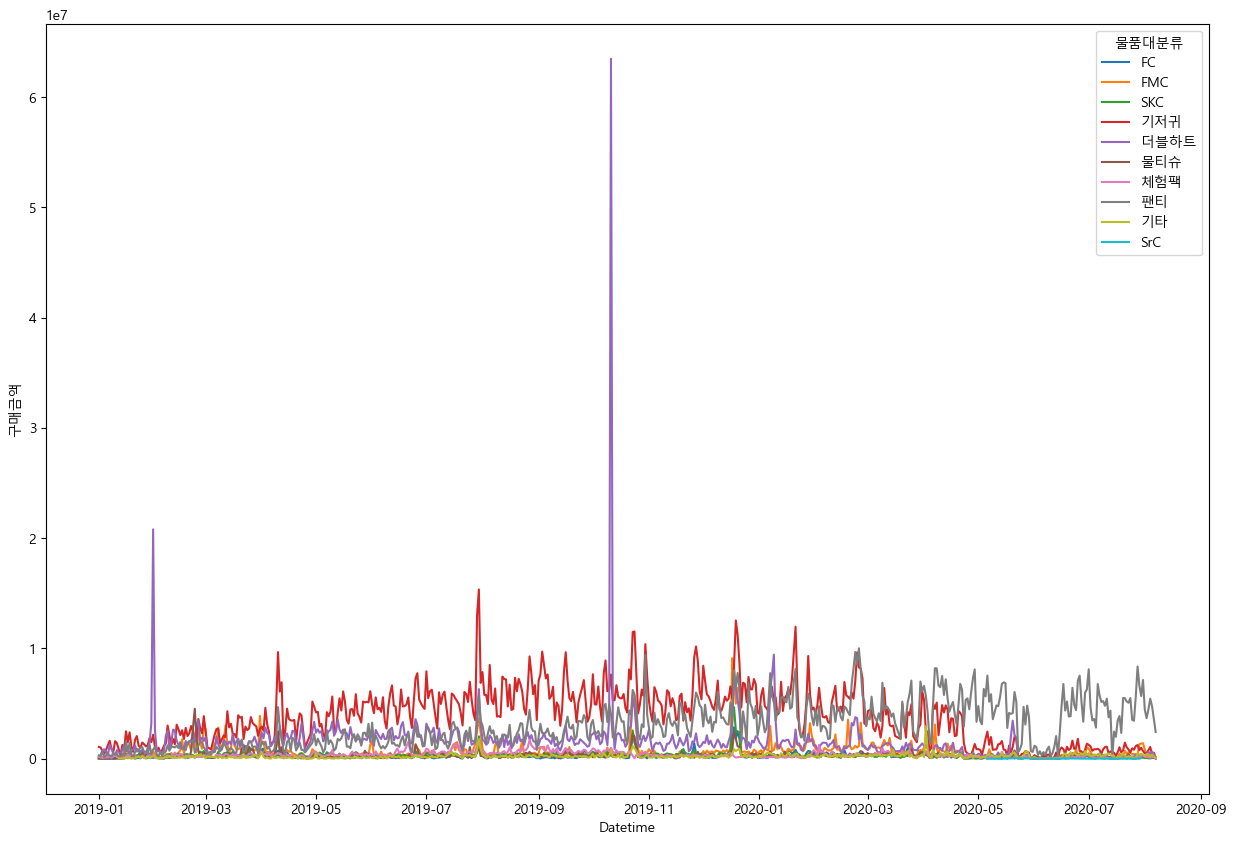

In [155]:
sns.lineplot(data =p2, x= 'Datetime', y = '구매금액', hue = '물품대분류')
plt.show()

# 시각화 결과 
- 더블하트 제품이 이상적으로 치솟았던 현상을 볼 수 있다. : 특수한 상황(할인, 이벤트 등)을 고려해 볼 수 있다.
: 해당 데이터는 다른 데이터에 영향을 줄 수 있기 때문에 제거하고 분석하는 것이 필요

In [156]:
df3

주문번호         구매일       배송시작일       배송완료일  \
0                  201905052342970  2019-05-06  2019-05-07  2019-05-11   
1                  202002203424450  2020-02-20  2020-02-21  2020-02-23   
2                  201902282095385  2019-02-28  2019-03-01  2019-03-05   
3                  201905132367003  2019-05-13  2019-05-14  2019-05-16   
4                  201905092356247  2019-05-10  2019-05-11  2019-05-13   
...                            ...         ...         ...         ...   
199994  20200724113704-52679491210  2020-07-24  2020-07-25  2020-07-27   
199995  20200729134816-18220910068  2020-07-29  2020-07-30  2020-08-01   
199996  20200803080150-09054399128  2020-08-03  2020-08-04  2020-08-07   
199997  20200805171023-18783441109  2020-08-06  2020-08-07  2020-08-11   
199998  20200805224157-34181488371  2020-08-06  2020-08-07  2020-08-09   

        구매시월령(수정)                  고객번호   구매금액   결제금액 물품대분류  \
0             4.0       201812310749735  25800  16314  더블하트   
1            14.0       201812310749735  51200  37769    팬티   
2             NaN       201812310749770   5610   3800   FMC   
3            66.0       201812310749771  59520  47922   기저귀   
4             5.0       201812310749774  50640  39788   기저귀   
...           ...                   ...    ...    ...   ...   
199994        5.0  20200724113017315991  11700   9240   FMC   
199995        NaN  20200729134409126553   3000   3000   체험팩   
199996        5.0  20200803075905757887   5900   5841   체험팩   
199997        NaN  20200805170229147688   3000   3000   체험팩   
199998        NaN  20200805223526494551   8500   8500    기타   

                                              상품명   Datetime  Year  Month  \
0                   더블하트 SofTouch 모유실감 젖꼭지 M (2입) 2019-05-06  2019      5   
1                NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형) 2020-02-20  2020      2   
2                          크리넥스？키즈용？화장지？3겹？27m 8롤 2019-02-28  2019      2   
3                  하기스 네이처메이드 밤부 3단계 여아 144매(밴드형) 2019-05-13  2019      5   
4                 하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형) 2019-05-10  2019      5   
...                                           ...        ...   ...    ...   
199994        크리넥스 뽑아쓰는 키친타월 펭수에디션 140매 X 4입 (EA) 2020-07-24  2020      7   
199995                                    맘큐 허그박스 2020-07-29  2020      7   
199996  NEW 하기스 맥스드라이 팬티 3단계 공용 20매(팬티형/체험팩) (EA) 2020-08-03  2020      8   
199997                                    맘큐 허그박스 2020-08-06  2020      8   
199998                            [먼치킨] 멀티 젖병솔 세트 2020-08-06  2020      8   

        Day day_of_week  
0         6      Monday  
1        20    Thursday  
2        28    Thursday  
3        13      Monday  
4        10      Friday  
...     ...         ...  
199994   24      Friday  
199995   29   Wednesday  
199996    3      Monday  
199997    6    Thursday  
199998    6    Thursday  

[199999 rows x 15 columns]

In [157]:
momqbox = df3['상품명'] == '맘큐 허그박스'
df3.loc[momqbox]

주문번호         구매일       배송시작일       배송완료일  \
92                 201909092822272  2019-09-10  2019-09-11  2019-09-13   
318                202001093283175  2020-01-10  2020-01-11  2020-01-13   
571                201906222512537  2019-06-22  2019-06-23  2019-06-26   
577                201907182614682  2019-07-18  2019-07-19  2019-07-21   
694                201910182957388  2019-10-18  2019-10-19  2019-10-22   
...                            ...         ...         ...         ...   
199988  20200701152623-23471312189  2020-07-02  2020-07-03  2020-07-07   
199989  20200705214443-43993064123  2020-07-06  2020-07-07  2020-07-09   
199992  20200722143921-14976246779  2020-07-22  2020-07-23  2020-07-25   
199995  20200729134816-18220910068  2020-07-29  2020-07-30  2020-08-01   
199997  20200805171023-18783441109  2020-08-06  2020-08-07  2020-08-11   

        구매시월령(수정)                  고객번호  구매금액  결제금액 물품대분류      상품명   Datetime  \
92           12.0       201812310749859  3000  3000   체험팩  맘큐 허그박스 2019-09-10   
318         167.0       201901010750103  3000  3000   체험팩  맘큐 허그박스 2020-01-10   
571          -2.0       201901010750330  3000  3000   체험팩  맘큐 허그박스 2019-06-22   
577           1.0       201901010750338  3000  3000   체험팩  맘큐 허그박스 2019-07-18   
694           0.0       201901010750441  3000  3000   체험팩  맘큐 허그박스 2019-10-18   
...           ...                   ...   ...   ...   ...      ...        ...   
199988        0.0  20200701145626242035  3000  3000   체험팩  맘큐 허그박스 2020-07-02   
199989        NaN  20200705213917994947  3000  3000   체험팩  맘큐 허그박스 2020-07-06   
199992        NaN  20200722141538955000  3000  3000   체험팩  맘큐 허그박스 2020-07-22   
199995        NaN  20200729134409126553  3000  3000   체험팩  맘큐 허그박스 2020-07-29   
199997        NaN  20200805170229147688  3000  3000   체험팩  맘큐 허그박스 2020-08-06   

        Year  Month  Day day_of_week  
92      2019      9   10     Tuesday  
318     2020      1   10      Friday  
571     2019      6   22    Saturday  
577     2019      7   18    Thursday  
694     2019     10   18      Friday  
...      ...    ...  ...         ...  
199988  2020      7    2    Thursday  
199989  2020      7    6      Monday  
199992  2020      7   22   Wednesday  
199995  2020      7   29   Wednesday  
199997  2020      8    6    Thursday  

[12077 rows x 15 columns]

In [158]:
# 기저귀 데이터만 분석
cond1 = (df3['물품대분류'] == '기저귀')
df3.loc[cond1]

주문번호         구매일       배송시작일       배송완료일  \
3                  201905132367003  2019-05-13  2019-05-14  2019-05-16   
4                  201905092356247  2019-05-10  2019-05-11  2019-05-13   
5                  201907282649358  2019-07-29  2019-07-30  2019-08-02   
11                 201908082705259  2019-08-09  2019-08-10  2019-08-12   
16                 201906242522007  2019-06-25  2019-06-26  2019-06-28   
...                            ...         ...         ...         ...   
199968  20200621102552-20845557425  2020-06-21  2020-06-22  2020-06-24   
199969  20200621102552-20845557425  2020-06-21  2020-06-22  2020-06-24   
199971  20200625123805-45572462388  2020-06-25  2020-06-26  2020-06-28   
199982  20200627233510-33942274635  2020-06-28  2020-06-29  2020-07-01   
199990  20200708231905-73449246312  2020-07-09  2020-07-10  2020-07-12   

        구매시월령(수정)                  고객번호    구매금액   결제금액 물품대분류  \
3            66.0       201812310749771   59520  47922   기저귀   
4             5.0       201812310749774   50640  39788   기저귀   
5             8.0       201812310749774  101280  76744   기저귀   
11            NaN       201812310749783   52320  43689   기저귀   
16            5.0       201812310749784   50640  37209   기저귀   
...           ...                   ...     ...    ...   ...   
199968        5.0  20200614141532175234   43400  21852   기저귀   
199969        5.0  20200614141532175234   49900  38002   기저귀   
199971        1.0  20200617223902505156   43400  24466   기저귀   
199982        5.0  20200627231604996693   49900  33072   기저귀   
199990        6.0  20200708231025349606   49900  28102   기저귀   

                                             상품명   Datetime  Year  Month  Day  \
3                 하기스 네이처메이드 밤부 3단계 여아 144매(밴드형) 2019-05-13  2019      5   13   
4                하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형) 2019-05-10  2019      5   10   
5       [2019년형] 하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형) 2019-07-29  2019      7   29   
11                   하기스 네이처메이드 3단계 남아 132매(밴드형) 2019-08-09  2019      8    9   
16      [2019년형] 하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형) 2019-06-25  2019      6   25   
...                                          ...        ...   ...    ...  ...   
199968            NEW 하기스 맥스드라이 3단계 공용 132매(밴드형) 2020-06-21  2020      6   21   
199969        하기스 NEW 네이처메이드 썸머 3단계 공용 120매(밴드형) 2020-06-21  2020      6   21   
199971            NEW 하기스 맥스드라이 2단계 공용 156매(밴드형) 2020-06-25  2020      6   25   
199982        하기스 NEW 네이처메이드 썸머 3단계 공용 120매(밴드형) 2020-06-28  2020      6   28   
199990        하기스 NEW 네이처메이드 썸머 3단계 공용 120매(밴드형) 2020-07-09  2020      7    9   

       day_of_week  
3           Monday  
4           Friday  
5           Monday  
11          Friday  
16         Tuesday  
...            ...  
199968      Sunday  
199969      Sunday  
199971    Thursday  
199982      Sunday  
199990    Thursday  

[35404 rows x 15 columns]

# ARIMA모델

In [159]:
import statsmodels.tsa.api as tsa

In [160]:
df3.head()

주문번호         구매일       배송시작일       배송완료일  구매시월령(수정)  \
0  201905052342970  2019-05-06  2019-05-07  2019-05-11        4.0   
1  202002203424450  2020-02-20  2020-02-21  2020-02-23       14.0   
2  201902282095385  2019-02-28  2019-03-01  2019-03-05        NaN   
3  201905132367003  2019-05-13  2019-05-14  2019-05-16       66.0   
4  201905092356247  2019-05-10  2019-05-11  2019-05-13        5.0   

              고객번호   구매금액   결제금액 물품대분류                               상품명  \
0  201812310749735  25800  16314  더블하트     더블하트 SofTouch 모유실감 젖꼭지 M (2입)   
1  201812310749735  51200  37769    팬티  NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형)   
2  201812310749770   5610   3800   FMC            크리넥스？키즈용？화장지？3겹？27m 8롤   
3  201812310749771  59520  47922   기저귀    하기스 네이처메이드 밤부 3단계 여아 144매(밴드형)   
4  201812310749774  50640  39788   기저귀   하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형)   

    Datetime  Year  Month  Day day_of_week  
0 2019-05-06  2019      5    6      Monday  
1 2020-02-20  2020      2   20    Thursday  
2 2019-02-28  2019      2   28    Thursday  
3 2019-05-13  2019      5   13      Monday  
4 2019-05-10  2019      5   10      Friday

In [161]:
df_time = pd.pivot_table(data = df3, index = 'Datetime', values= '구매금액', aggfunc='sum')
df_time.head()
# index Datetime

구매금액
Datetime           
2019-01-01  1838870
2019-01-02  1776400
2019-01-03  2426240
2019-01-04  1683110
2019-01-05  2097050

In [162]:
y = df_time['구매금액'].resample('1D').mean()

In [163]:
y.isnull().sum()

4

In [164]:
y1 = y.fillna(method='bfill') # 결측값 대체

In [165]:
y1 # 시계열분석은 레코드 수가 최소 50개 이상은 되어야 하는데 수가 부족해서 일단위로 진행했음

Datetime
2019-01-01    1838870.0
2019-01-02    1776400.0
2019-01-03    2426240.0
2019-01-04    1683110.0
2019-01-05    2097050.0
                ...    
2020-08-03    6911090.0
2020-08-04    8034210.0
2020-08-05    6836140.0
2020-08-06    5328430.0
2020-08-07    2969600.0
Freq: D, Name: 구매금액, Length: 585, dtype: float64

In [166]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
# 이쁘게 볼라고 사용

C:\Users\DMCCONET\anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py:338: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.tight_layout()
C:\Users\DMCCONET\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


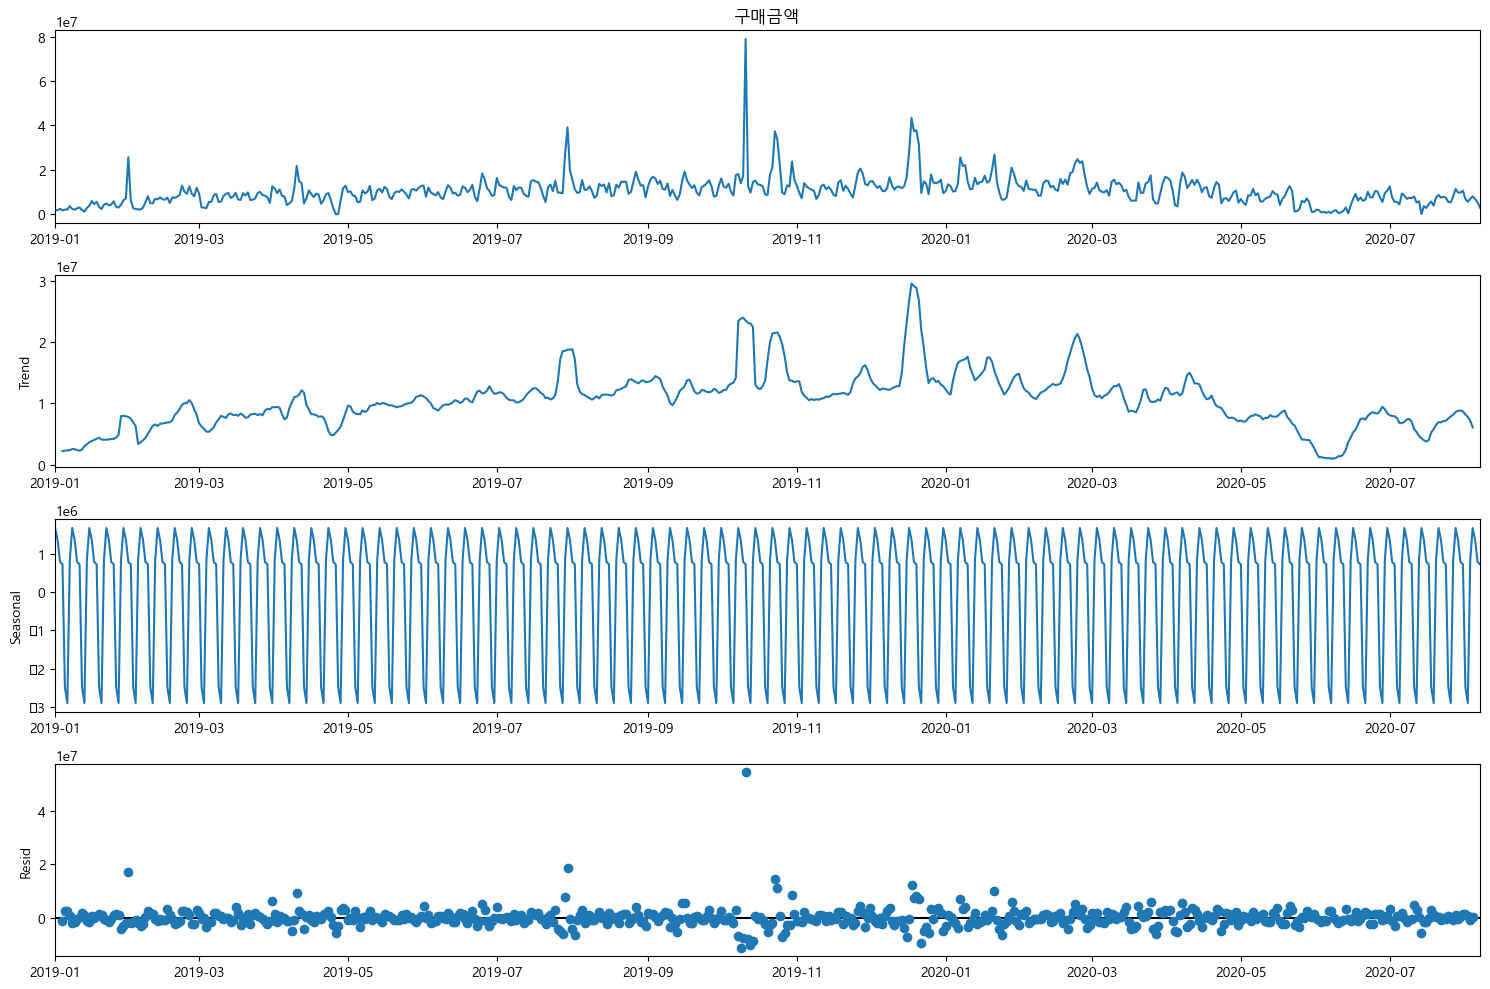

In [167]:
# 시계열 모델 생성
model_series = tsa.seasonal_decompose(y1,model='additive')
# 모델 시각화
fig = model_series.plot()
plt.show()

↑ 시계열 분해
추세 : 
계절성 : 일정한 계절성이 있다.
잔차 : 

In [168]:
# p: p시점 전의 자료가 현재 시점의 데이터에 영향을 주는 자기회귀모델
# d : 차분

In [169]:
import itertools

In [170]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [171]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [172]:
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [173]:
param_list = []
param_seasonal_list = []
results_AIC_list = []

In [174]:
for param in pdq:
     for param_seasonal in seasonal_pdq:
        try:
            mod = tsa.statespace.SARIMAX(y1,order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
             continue

In [175]:
ARIMA_list = pd.DataFrame({'Parameter':param_list,'Seasonal':param_seasonal_list,'AIC':results_AIC_list})
ARIMA_list.to_excel('arima_model_list.xlsx')

In [176]:
ARIMA_list.sort_values(by='AIC')
#AIC : 값이 낮을 수록 모형 적합도가 높은것을 의미함

Parameter       Seasonal           AIC
59  (1, 1, 1)  (0, 1, 1, 12)  18903.271624
63  (1, 1, 1)  (1, 1, 1, 12)  18905.207128
43  (1, 0, 1)  (0, 1, 1, 12)  18913.621564
47  (1, 0, 1)  (1, 1, 1, 12)  18915.260982
11  (0, 0, 1)  (0, 1, 1, 12)  18943.574721
..        ...            ...           ...
9   (0, 0, 1)  (0, 0, 1, 12)  19852.880775
12  (0, 0, 1)  (1, 0, 0, 12)  19864.594359
1   (0, 0, 0)  (0, 0, 1, 12)  20070.229906
8   (0, 0, 1)  (0, 0, 0, 12)  20343.132819
0   (0, 0, 0)  (0, 0, 0, 12)  20719.323136

[64 rows x 3 columns]

In [177]:
# AIC가 낮은 Parameter =(1,1,1) 모델로 구성
mod = tsa.statespace.SARIMAX(y1,order=(1, 1, 1),seasonal_order=(0, 1, 1, 12),
                              enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               구매금액   No. Observations:                  585
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -9447.636
Date:                            Wed, 18 Jan 2023   AIC                          18903.272
Time:                                    21:17:56   BIC                          18920.569
Sample:                                01-01-2019   HQIC                         18910.027
                                     - 08-07-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4338      0.058      7.472      0.000       0.320       0.548
ma.L1         -0.9221      0.055   

↑모델 구성 완료 
평가 :
SARIMAX : 트렌드여부에 대해 ARIMA모델을 생성, 계절성에 대해서도 ARIMA모델을 추가적으로 수행한 것
  SARIMAX(1, 1, 1)(=계절성이 없는 파라미터 추가)x(0, 1, 1, 12)(= 계절성이 있는 파라미터 추가)
BIC = 변수가 더 많은 경우,AIC에 더 많은 패널티를 부여해 계산

- Order (p,d,q) Seasonal Order(P,D,Q,M)
    - p : AR에서의 p 값 (p구간 내 데이터 사이의 상관관계)
    - d : 차분
    - q : MA PACF 편상관계수 q값을 의미
계절성이 있는 파라미터 추가 (0,1,1,12)
    - P : p구간 내 데이터 사이의 상관관계
    - D : 계절성 여부 (1 or 0)
    - Q : 계절성이 반복되는 횟수
    - M : 계절성 주기가 어떻게 되는가
### coef
회귀계수
귀무가설 : 회귀계수가 유의미하지 않다.
대립가설 : 회귀계수가 유의미하다.
P>|z| : 관측치와 회귀계수(coef)가 얼마나 상관성이 있느냐 
-> 0.05보다 낮으므로 대립가설 채택

통계량에 대한 신뢰구간 : [0.025      0.975]

##### 실무에서 일반적으로 회귀분석할 때 잔차가 정규분포를 띄는것을 무시하고 모델을 만들기 때문에 크게 상관하지 않아도 된다.
**↓

**Ljung-Box Test (륭 박스 검정) : 일정 기간 동안 관측치가 랜덤이고 독립적인지 여부를 검정** 
    - 귀무가설 : 데이터가 상관관계를 나타내지 않는다. (상관계수 = 0)
    - 대립가설 : 데이터가 상관관계를 나타낸다. (상관계수 != 0)
    - 0.05 보다 작으면, 대립가설 채택 (데이터가 상관관계를 나타낸다, 해당 회귀 계수는 유의미하다) 
Prob(Q):                              0.58

## 위의 모델은 귀무가설 채택 (Prob(Q)<0.05)

**Jarque - Bera Test (쟈크베라 검정)**
* Sample 데이터의 왜도와 첨도가 정규분포가 일치하는지 가설검정
* SARIMAX에서 잔차(residual)의 분포가 정규분포를 띄는지 확인 
* 귀무가설 : 해당 Sample은 정규분포와 일치한다.
* 대립가설 : 해당 Sample은 정규분포와 일치하지 않는다. 
Prob(JB): 0.00 (<0.05) -대립가설 채택 / 정규분포를 띄지 않는다. : 회귀계수로 설명할 수 없는 트렌드가 들어가있어 새로운값을 예측할 때 영향을 줄 수 있다.

왜도(Skew) : 4.16
첨도(Kurtosis) : 64.17

[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.41e+44. Standard errors may be unstable.

C:\Users\DMCCONET\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


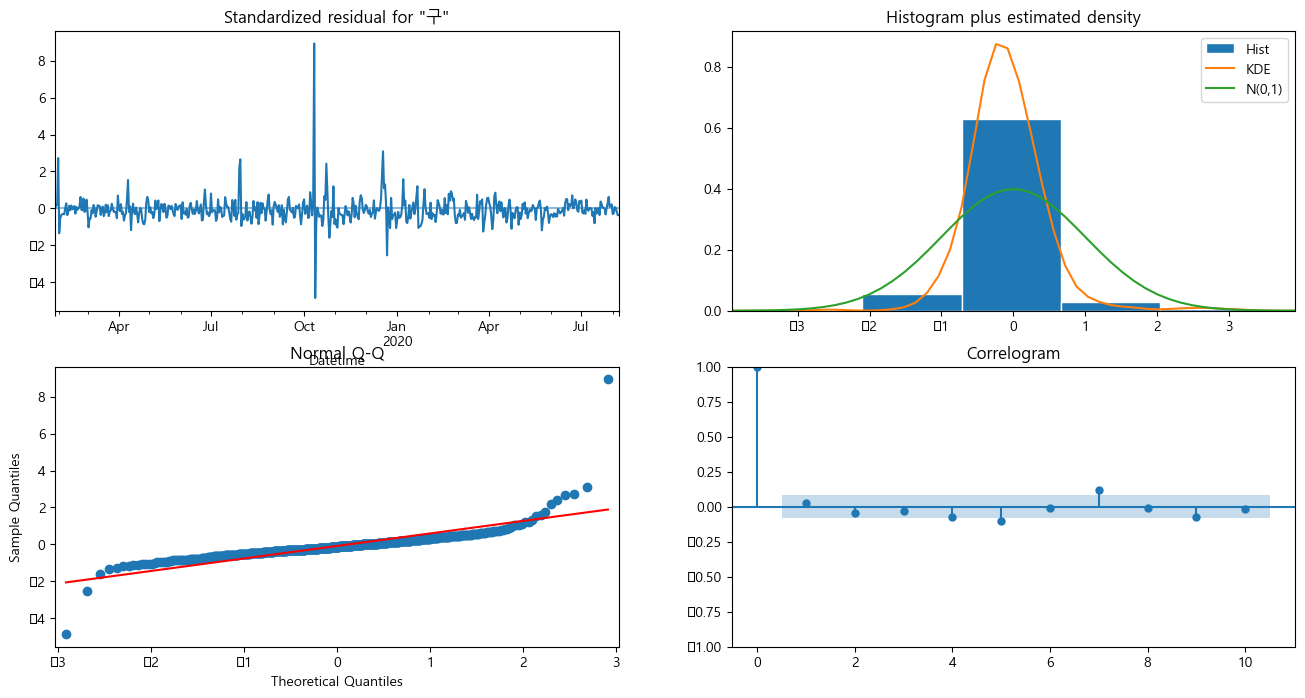

In [178]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [179]:
results.get_prediction()

In [180]:
y1.head()

Datetime
2019-01-01    1838870.0
2019-01-02    1776400.0
2019-01-03    2426240.0
2019-01-04    1683110.0
2019-01-05    2097050.0
Freq: D, Name: 구매금액, dtype: float64

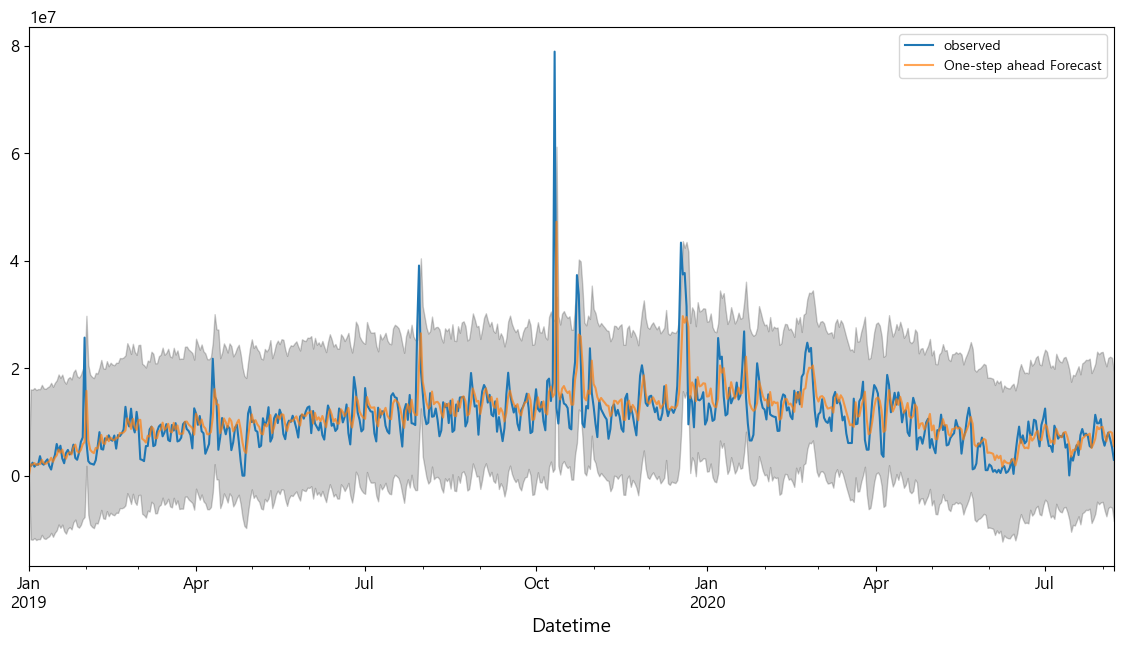

In [239]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y1.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.legend()
plt.show()

In [181]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pd.DataFrame(pred.predicted_mean).reset_index()

Datetime  predicted_mean
0   2019-01-01    0.000000e+00
1   2019-01-02    2.104787e+06
2   2019-01-03    2.052095e+06
3   2019-01-04    2.363169e+06
4   2019-01-05    1.987783e+06
..         ...             ...
580 2020-08-03    6.404736e+06
581 2020-08-04    7.952241e+06
582 2020-08-05    8.192007e+06
583 2020-08-06    7.990969e+06
584 2020-08-07    5.514663e+06

[585 rows x 2 columns]

In [182]:
y_forecasted = pred.predicted_mean
y_truth = y['2019-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))

MSE 22723590986896.02


C:\Users\DMCCONET\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


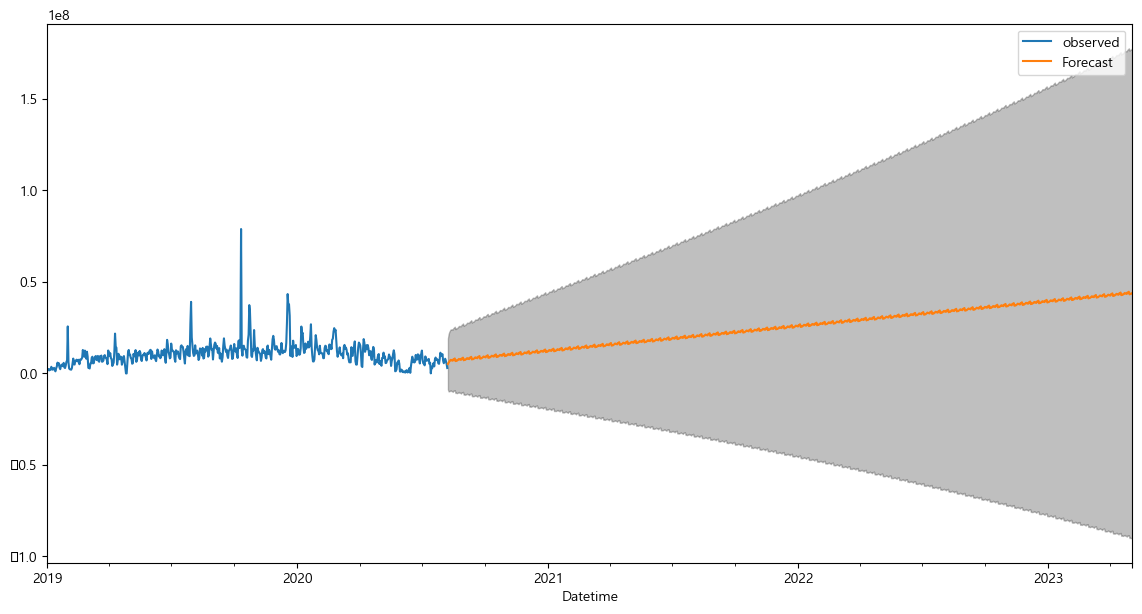

In [187]:
pred_uc = results.get_forecast(steps=1000)
pred_ci = pred_uc.conf_int() #추정된 계수의 신뢰구간 계산
ax = y1.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.25)

plt.legend()
plt.show()

In [188]:
# 물품 구매량 예측
pred_ci['구매금액예측'] = (pred_ci['lower 구매금액'] + pred_ci['upper 구매금액']) / 2
pred_ci

lower 구매금액    upper 구매금액        구매금액예측
2020-08-08 -8.776342e+06  1.913442e+07  5.179039e+06
2020-08-09 -9.815974e+06  2.153731e+07  5.860667e+06
2020-08-10 -9.722641e+06  2.272905e+07  6.503203e+06
2020-08-11 -9.524824e+06  2.344231e+07  6.958742e+06
2020-08-12 -9.224537e+06  2.407513e+07  7.425295e+06
...                  ...           ...           ...
2023-04-30 -8.991673e+07  1.763393e+08  4.321129e+07
2023-05-01 -8.974682e+07  1.768143e+08  4.353372e+07
2023-05-02 -9.002783e+07  1.768212e+08  4.339671e+07
2023-05-03 -8.988075e+07  1.772489e+08  4.368410e+07
2023-05-04 -8.971792e+07  1.776891e+08  4.398557e+07

[1000 rows x 3 columns]

In [186]:
df3['구매금액']

0         25800
1         51200
2          5610
3         59520
4         50640
          ...  
199994    11700
199995     3000
199996     5900
199997     3000
199998     8500
Name: 구매금액, Length: 199999, dtype: int64

# 월별 배송기간 보기

In [180]:
exdf1 = pd.read_csv('Data1234.csv')

In [181]:
exdf1

Unnamed: 0          고객번호 성별 결혼유무 거주지역  연령  결제등록카드    유입경로 자녀여부  \
0                0  2.018120e+14  여   기혼   인천  37    국민은행   인스타그램  Yes   
1                1  2.018120e+14  여   기혼   강원  33  농협회원조합   인스타그램  Yes   
2                2  2.018120e+14  여   기혼   대전  32   농협중앙회   네이버카페  Yes   
3                3  2.018120e+14  여   기혼   제주  32    롯데카드   네이버카페  Yes   
4                4  2.018120e+14  여   기혼   서울  31    국민은행   인스타그램  Yes   
...            ...           ... ..  ...  ...  ..     ...     ...  ...   
195660      196603  2.019120e+14  여   기혼   전북  37    신한카드   인스타그램  Yes   
195661      196604  2.019120e+14  여   기혼   대전  30    BC카드    페이스북  Yes   
195662      196605  2.019120e+14  여   기혼   서울  26    신한은행  네이버블로그  Yes   
195663      196606  2.019120e+14  여   기혼   경기  32    롯데카드   인스타그램  Yes   
195664      196607  2.019120e+14  여   기혼   경기  32    롯데카드   인스타그램  Yes   

                              주문번호  ... 배송수량   구매금액   결제금액  물품대분류  \
0                  201905052342970  ...    1  25800  16314   더블하트   
1                  201812311862368  ...    1  25800  16314   더블하트   
2                  201904142278370  ...    1  25800  17344   더블하트   
3                  201905202392233  ...    1  12900   9692   더블하트   
4                  201907172607939  ...    1  12900   9692   더블하트   
...                            ...  ...  ...    ...    ...    ...   
195660             201912223227671  ...    1  22900  22900     기타   
195661  20200517121012-55728978941  ...    1  25100  25100     기타   
195662             202003113518381  ...    1   7100   6326     FC   
195663             202002123398121  ...    1   9900   9900     기타   
195664             202003013475179  ...    1  26250  26250     기타   

                     구매일_dt             배송시작일_dt             배송완료일_dt  상품준비기간  \
0       2019-05-06 00:00:00  2019-05-07 00:00:00  2019-05-11 00:00:00       1   
1       2019-01-01 00:00:00  2019-01-02 00:00:00  2019-01-04 00:00:00       1   
2       2019-04-14 00:00:00  2019-04-15 00:00:00  2019-04-18 00:00:00       1   
3       2019-05-21 00:00:00  2019-05-22 00:00:00  2019-05-25 00:00:00       1   
4       2019-07-17 00:00:00  2019-07-18 00:00:00  2019-07-20 00:00:00       1   
...                     ...                  ...                  ...     ...   
195660  2019-12-22 00:00:00  2019-12-23 00:00:00  2019-12-25 00:00:00       1   
195661  2020-05-17 00:00:00  2020-05-18 00:00:00  2020-05-20 00:00:00       1   
195662  2020-03-11 00:00:00  2020-03-12 00:00:00  2020-03-14 00:00:00       1   
195663  2020-02-13 00:00:00  2020-02-14 00:00:00  2020-02-16 00:00:00       1   
195664  2020-03-02 00:00:00  2020-03-03 00:00:00  2020-03-06 00:00:00       1   

        배송기간 구매월  
0          4   5  
1          2   1  
2          3   4  
3          3   5  
4          2   7  
...      ...  ..  
195660     2  12  
195661     2   5  
195662     2   3  
195663     2   2  
195664     3   3  

[195665 rows x 26 columns]

In [186]:
f2 = pd.pivot_table(data = exdf1,
                   index = ['구매월','물품대분류'],
                   values = '배송기간', aggfunc ='mean').reset_index()

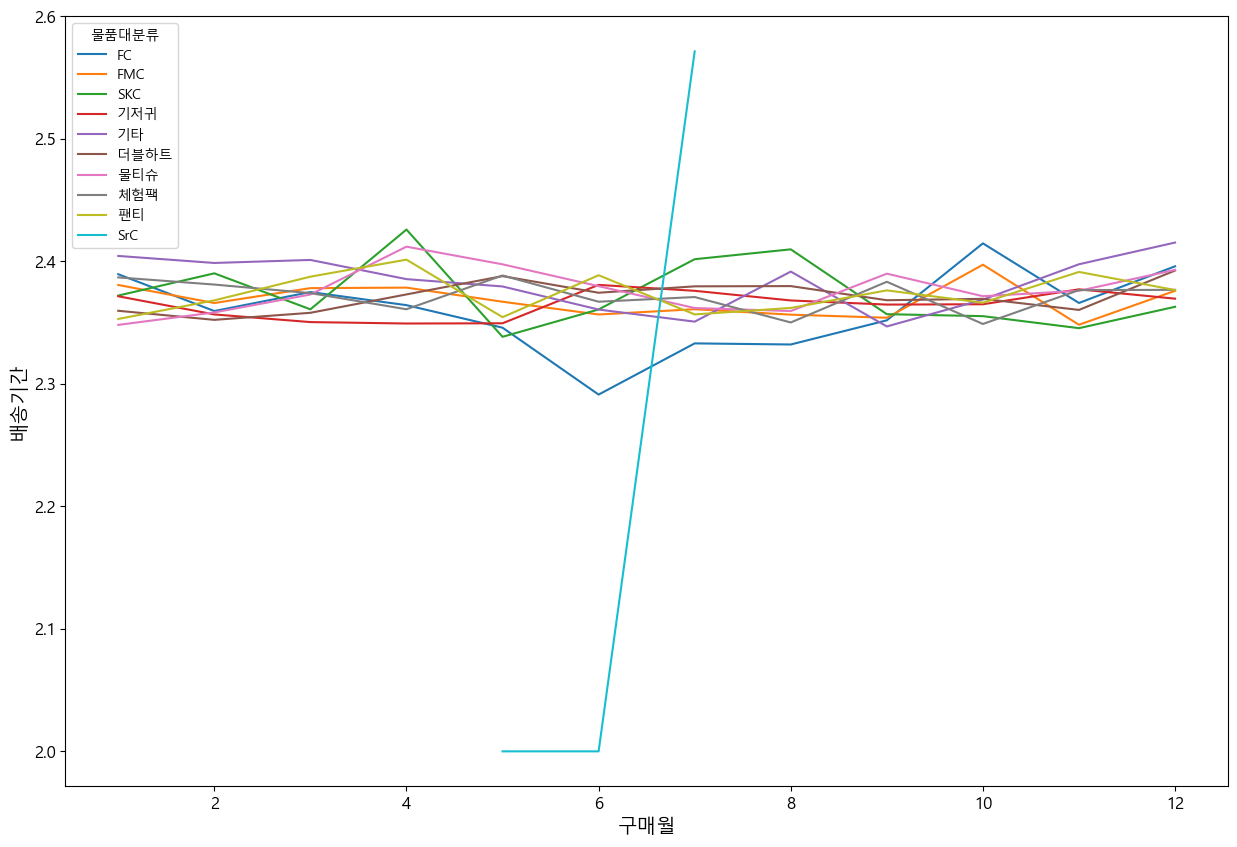

In [187]:
sns.lineplot(data =f2, x= '구매월', y = '배송기간', hue = '물품대분류')
plt.show()

# 판매량(주문량)으로 시계열 분석

In [308]:
df3.isnull().sum()

주문번호               0
구매일                0
배송시작일              0
배송완료일              0
구매시월령(수정)      31857
고객번호               0
구매금액               0
결제금액               0
물품대분류              0
상품명                0
Datetime           0
Year               0
Month              0
Day                0
day_of_week        0
판매량                0
dtype: int64

In [249]:
#판매량 컬럼 만들기
df3['판매량'] = 1
df3.pivot_table(index=['구매일', '상품명'], values='판매량', aggfunc='sum')

판매량
구매일        상품명                                         
2019-01-01 [2018년형]닥터마밍 모이스쳐 아기물티슈 캡형 72매X10팩         1
           [신규회원 한정특가] 하기스 맥스드라이 2단계 공용 52매(밴드형)      7
           [하기스 샘플러_3단계 남아] + 매직핏팬티 체험팩               1
           [하기스 샘플러_3단계 여아] + 매직핏팬티 체험팩               4
           그린핑거 마이키즈 자두야에디션 샴푸 프레쉬 320ml              1
...                                                 ...
2020-08-07 하기스 NEW 네이처메이드 썸머팬티 5단계 공용 68매(팬티형) X 2    1
           하기스 네이처메이드 밤부 5단계 남아 102매(밴드형)             1
           하기스 네이처메이드 팬티 6단계 여아 150매(팬티형)             1
           하기스 네이처메이드 팬티 밤부 4단계 남아 108매(팬티형)          1
           하기스 네이처메이드 팬티 밤부 6단계 남아 76매(팬티형)           1

[84395 rows x 1 columns]

In [252]:
p3 = pd.pivot_table(data = df3,
                   index = ['Datetime','물품대분류'],
                   values = '판매량', aggfunc ='sum').reset_index()

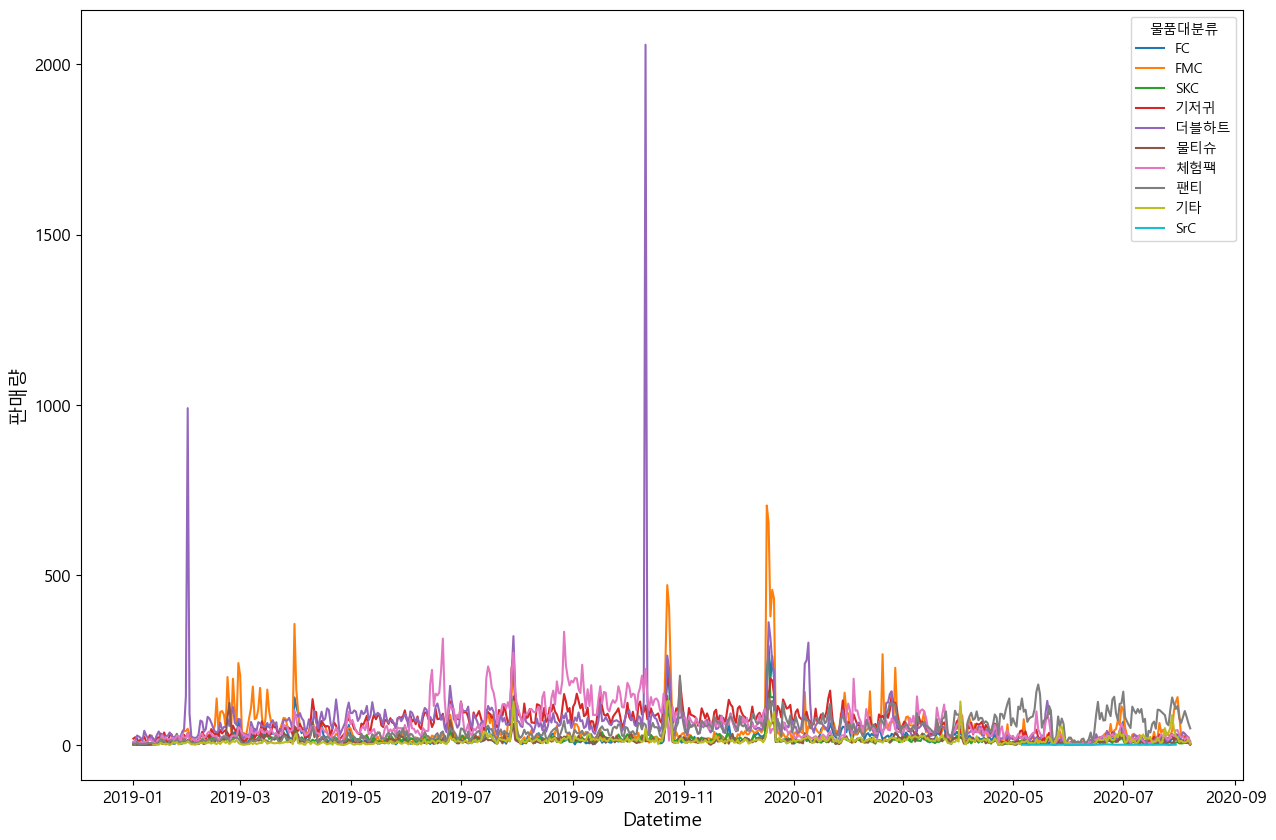

In [253]:
sns.lineplot(data =p3, x= 'Datetime', y = '판매량', hue = '물품대분류')
plt.show()

# 시각화 결과
-더블하트 제품 제외하고 예측 필요하다고 생각함

In [254]:
# ARIMA모델
import statsmodels.tsa.api as tsa
df3.head()

주문번호         구매일       배송시작일       배송완료일  구매시월령(수정)  \
0  201905052342970  2019-05-06  2019-05-07  2019-05-11        4.0   
1  202002203424450  2020-02-20  2020-02-21  2020-02-23       14.0   
2  201902282095385  2019-02-28  2019-03-01  2019-03-05        NaN   
3  201905132367003  2019-05-13  2019-05-14  2019-05-16       66.0   
4  201905092356247  2019-05-10  2019-05-11  2019-05-13        5.0   

              고객번호   구매금액   결제금액 물품대분류                               상품명  \
0  201812310749735  25800  16314  더블하트     더블하트 SofTouch 모유실감 젖꼭지 M (2입)   
1  201812310749735  51200  37769    팬티  NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형)   
2  201812310749770   5610   3800   FMC            크리넥스？키즈용？화장지？3겹？27m 8롤   
3  201812310749771  59520  47922   기저귀    하기스 네이처메이드 밤부 3단계 여아 144매(밴드형)   
4  201812310749774  50640  39788   기저귀   하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형)   

    Datetime  Year  Month  Day day_of_week  판매량  
0 2019-05-06  2019      5    6      Monday    1  
1 2020-02-20  2020      2   20    Thursday    1  
2 2019-02-28  2019      2   28    Thursday    1  
3 2019-05-13  2019      5   13      Monday    1  
4 2019-05-10  2019      5   10      Friday    1

In [256]:
df_time = pd.pivot_table(data = df3, index = 'Datetime', values= '판매량', aggfunc='sum')
df_time.head()
# index Datetime

판매량
Datetime       
2019-01-01   49
2019-01-02   52
2019-01-03   77
2019-01-04   56
2019-01-05   59

In [257]:
y = df_time['판매량'].resample('1D').mean()

In [260]:
y.isnull().sum()

4

In [261]:
y2 = y.fillna(method='bfill') # 결측값 대체

In [262]:
y2 # 시계열분석은 레코드 수가 최소 50개 이상은 되어야 하는데 수가 부족해서 일단위로 진행했음

Datetime
2019-01-01     49.0
2019-01-02     52.0
2019-01-03     77.0
2019-01-04     56.0
2019-01-05     59.0
              ...  
2020-08-03    216.0
2020-08-04    234.0
2020-08-05    192.0
2020-08-06    175.0
2020-08-07     87.0
Freq: D, Name: 판매량, Length: 585, dtype: float64

In [263]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
# 이쁘게 볼라고 사용

C:\Users\DMCCONET\anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py:338: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.tight_layout()
C:\Users\DMCCONET\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


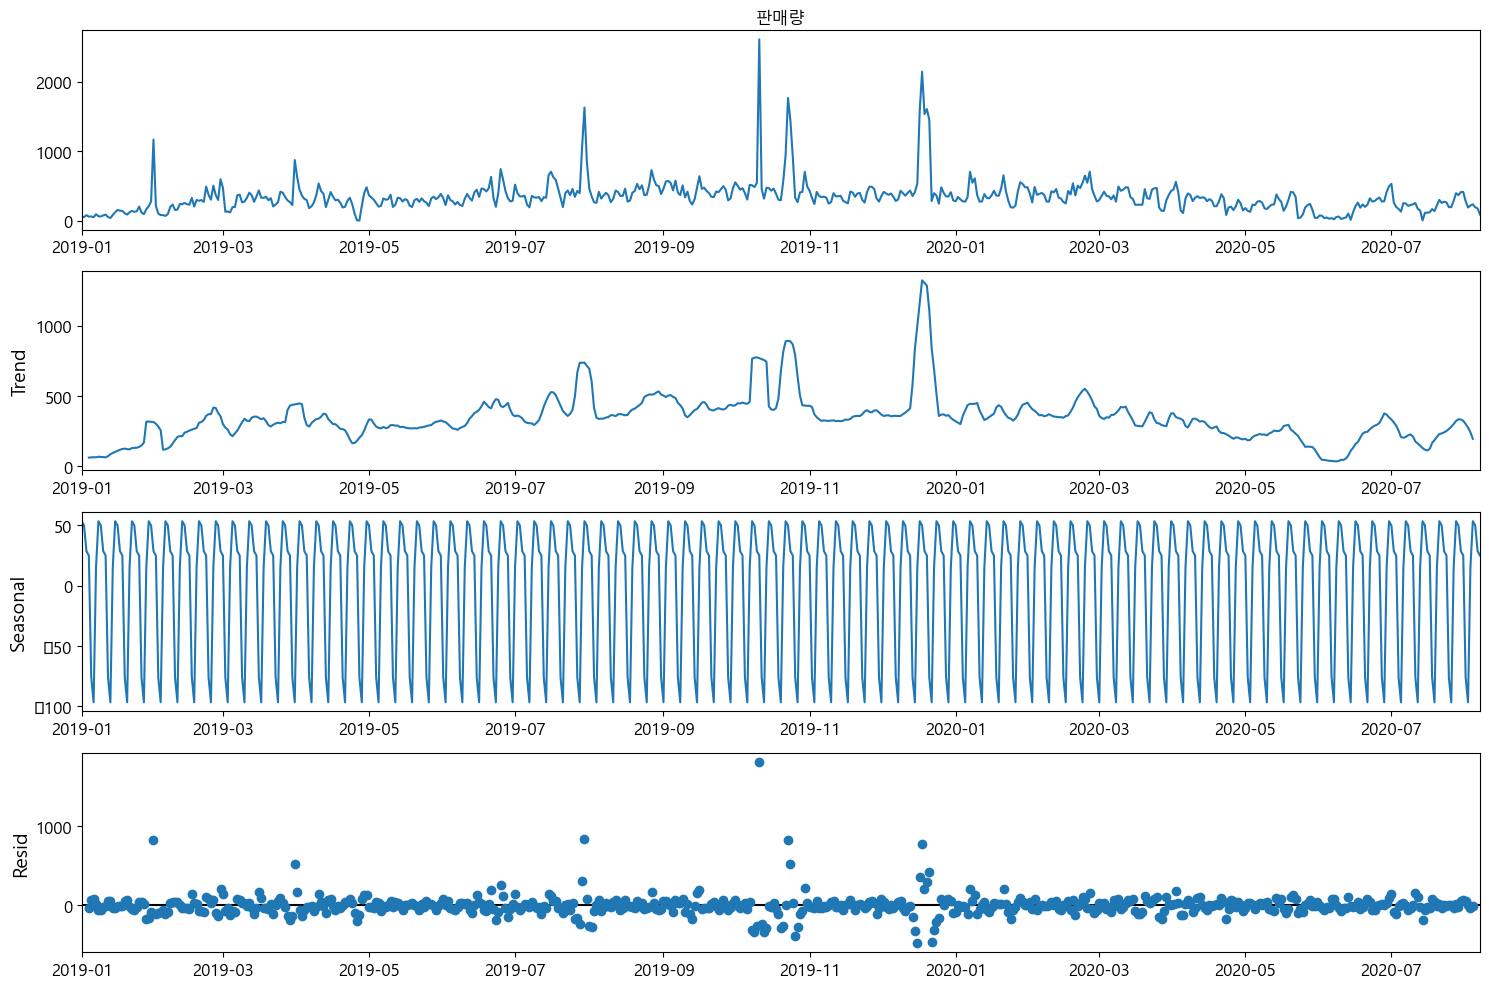

In [275]:
# 시계열 모델 생성
model_series = tsa.seasonal_decompose(y2,model='additive')
# 모델 시각화
fig = model_series.plot()
plt.show()


↑ 시계열 분해
추세 : 
계절성 : 일정한 계절성이 있다.
잔차 : 

In [276]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [277]:
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [278]:
param_list = []
param_seasonal_list = []
results_AIC_list = []

In [279]:
for param in pdq:
     for param_seasonal in seasonal_pdq:
        try:
            mod = tsa.statespace.SARIMAX(y1,order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
             continue


In [282]:
ARIMA_list = pd.DataFrame({'Parameter':param_list,'Seasonal':param_seasonal_list,'AIC':results_AIC_list})
ARIMA_list

Parameter       Seasonal          AIC
0   (0, 0, 0)  (0, 0, 0, 12)  8706.726643
1   (0, 0, 0)  (0, 0, 1, 12)  8285.780262
2   (0, 0, 0)  (0, 1, 0, 12)  8120.209130
3   (0, 0, 0)  (0, 1, 1, 12)  7721.156326
4   (0, 0, 0)  (1, 0, 0, 12)  8064.372064
..        ...            ...          ...
59  (1, 1, 1)  (0, 1, 1, 12)  7421.767656
60  (1, 1, 1)  (1, 0, 0, 12)  7546.703297
61  (1, 1, 1)  (1, 0, 1, 12)  7535.820189
62  (1, 1, 1)  (1, 1, 0, 12)  7619.620559
63  (1, 1, 1)  (1, 1, 1, 12)  7420.928115

[64 rows x 3 columns]

In [283]:
ARIMA_list.sort_values(by='AIC')
#AIC : 값이 낮을 수록 모형 적합도가 높은것을 의미함

Parameter       Seasonal          AIC
63  (1, 1, 1)  (1, 1, 1, 12)  7420.928115
59  (1, 1, 1)  (0, 1, 1, 12)  7421.767656
47  (1, 0, 1)  (1, 1, 1, 12)  7440.879531
43  (1, 0, 1)  (0, 1, 1, 12)  7445.533352
39  (1, 0, 0)  (1, 1, 1, 12)  7451.549795
..        ...            ...          ...
4   (0, 0, 0)  (1, 0, 0, 12)  8064.372064
2   (0, 0, 0)  (0, 1, 0, 12)  8120.209130
8   (0, 0, 1)  (0, 0, 0, 12)  8248.482797
1   (0, 0, 0)  (0, 0, 1, 12)  8285.780262
0   (0, 0, 0)  (0, 0, 0, 12)  8706.726643

[64 rows x 3 columns]

In [284]:
# AIC가 낮은 Parameter =(1,1,1) 모델로 구성
mod = tsa.statespace.SARIMAX(y2,order=(1, 1, 1),seasonal_order=(1, 1, 1, 12),
                              enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                판매량   No. Observations:                  585
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3705.464
Date:                            Wed, 18 Jan 2023   AIC                           7420.928
Time:                                    14:42:29   BIC                           7442.550
Sample:                                01-01-2019   HQIC                          7429.372
                                     - 08-07-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5698      0.017     34.134      0.000       0.537       0.602
ma.L1         -0.9722      0.017   

C:\Users\DMCCONET\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


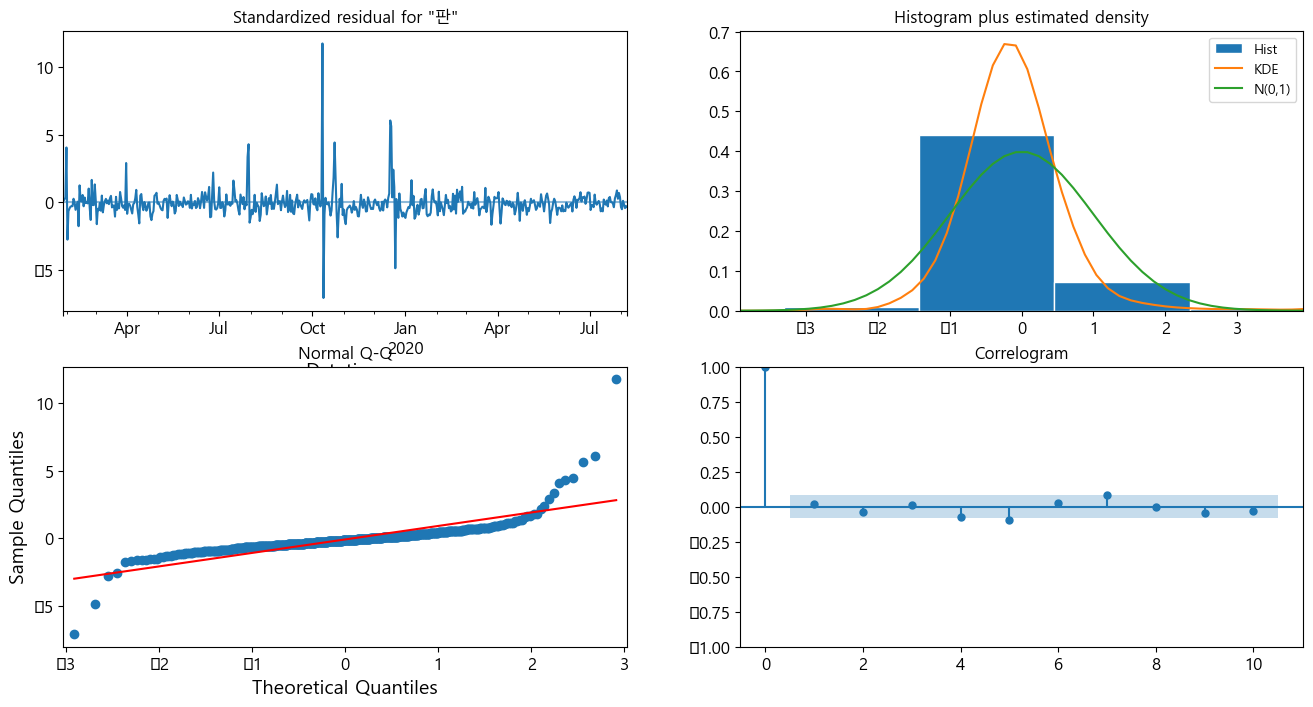

In [285]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()


In [286]:
results.get_prediction()

In [287]:
y2.head()

Datetime
2019-01-01    49.0
2019-01-02    52.0
2019-01-03    77.0
2019-01-04    56.0
2019-01-05    59.0
Freq: D, Name: 판매량, dtype: float64

C:\Users\DMCCONET\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


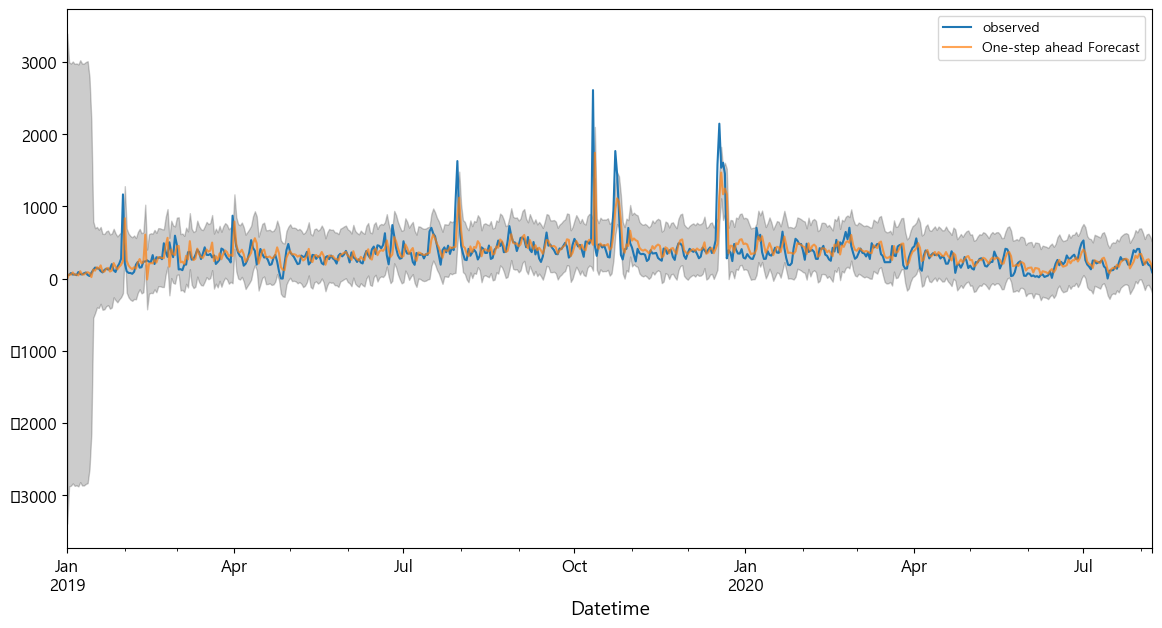

In [306]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y2.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.legend()
plt.show()

In [292]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pd.DataFrame(pred.predicted_mean).reset_index()

Datetime  predicted_mean
0   2019-01-01        0.000000
1   2019-01-02       58.306407
2   2019-01-03       55.394533
3   2019-01-04       85.413606
4   2019-01-05       51.978484
..         ...             ...
580 2020-08-03      195.464662
581 2020-08-04      258.439291
582 2020-08-05      268.736374
583 2020-08-06      225.078178
584 2020-08-07      150.329129

[585 rows x 2 columns]

In [293]:
y_forecasted = pred.predicted_mean
y_truth = y['2019-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))

MSE 33189.22


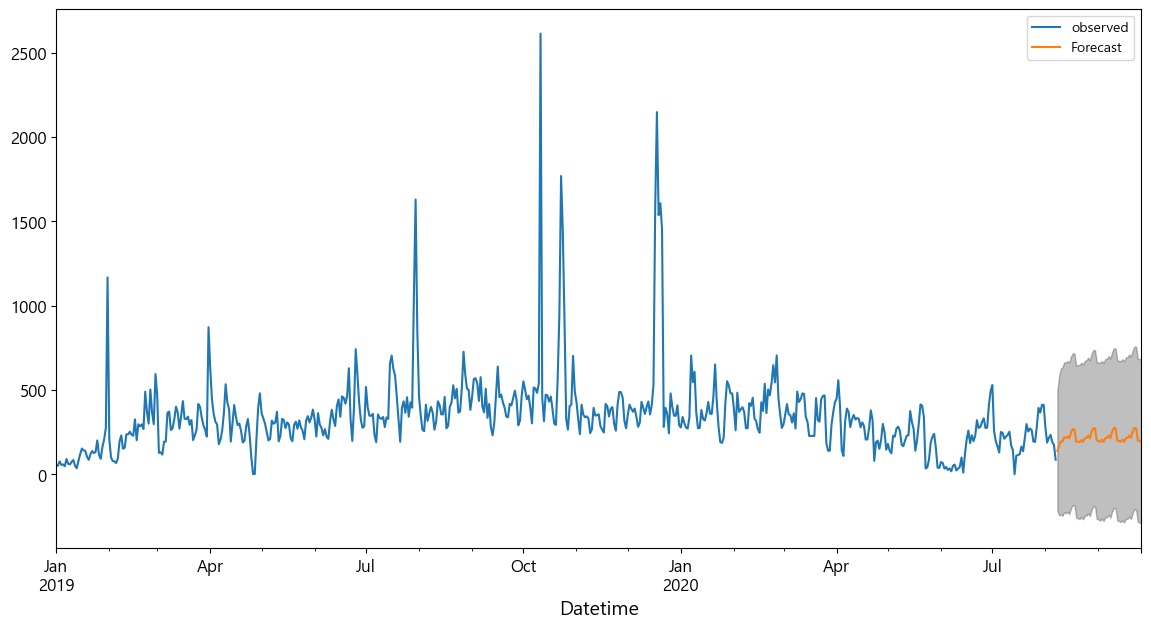

In [303]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int() #추정된 계수의 신뢰구간 계산
ax = y2.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.legend()
plt.show()

In [297]:
# 물품 판매량 예측
pred_ci['판매량 예측'] = (pred_ci['lower 판매량'] + pred_ci['upper 판매량']) / 2
pred_ci

lower 판매량   upper 판매량      판매량 예측
2020-08-08 -214.653901  492.856872  139.101485
2020-08-09 -242.662638  581.626272  169.481817
2020-08-10 -237.701494  626.857951  194.578229
2020-08-11 -245.567470  635.235085  194.833807
2020-08-12 -224.288801  664.013952  219.862576
2020-08-13 -230.698993  661.726653  215.513830
2020-08-14 -222.612781  672.448149  224.917684
2020-08-15 -235.085650  661.906279  213.410315
2020-08-16 -199.666312  698.902733  249.618210
2020-08-17 -182.249914  717.710674  267.730380
2020-08-18 -184.973654  716.278578  265.652462
2020-08-19 -258.581713  643.907984  192.663135
2020-08-20 -260.859005  648.199726  193.670360
2020-08-21 -265.292650  647.611968  191.159659
2020-08-22 -253.628751  661.896844  204.134046
2020-08-23 -266.430183  651.119051  192.344434
2020-08-24 -245.637452  673.566572  213.964560
2020-08-25 -244.972897  675.788337  215.407720
2020-08-26 -231.171541  691.059573  229.944016
2020-08-27 -247.000473  676.644373  214.821950
2020-08-28 -210.789607  714.236184  251.723289
2020-08-29 -189.600900  736.787694  273.593397
2020-08-30 -191.521136  736.220822  272.349843
2020-08-31 -264.269651  664.821572  200.275960
2020-09-01 -268.044753  663.588697  197.771972
2020-09-02 -273.817707  659.828067  193.005180
2020-09-03 -262.549368  672.832539  205.141585
2020-09-04 -275.954664  661.008865  192.527100
2020-09-05 -255.292515  683.114098  213.910792
2020-09-06 -254.189114  685.673408  215.742147
2020-09-07 -240.022235  701.269266  230.623516
2020-09-08 -256.093028  686.604928  215.255950
2020-09-09 -219.841760  724.248848  252.203544
2020-09-10 -198.410617  747.065363  274.327373
2020-09-11 -200.289088  746.569142  273.140027
2020-09-12 -272.992154  675.247999  201.127922
2020-09-13 -276.916022  673.688962  198.386470
2020-09-14 -282.803582  669.737786  193.467102
2020-09-15 -271.578382  682.672041  205.546830
2020-09-16 -285.037885  670.791008  192.876562
2020-09-17 -264.401113  692.889633  214.244260
2020-09-18 -263.281585  695.485300  216.101858
2020-09-19 -249.102328  711.115438  231.006555
2020-09-20 -265.201298  696.446077  215.622390
2020-09-21 -228.958929  734.105149  252.573110
2020-09-22 -207.522993  756.951179  274.714093
2020-09-23 -209.410300  756.471394  273.530547
2020-09-24 -282.122072  685.167310  201.522619
2020-09-25 -286.067689  683.597913  198.765112
2020-09-26 -291.975135  679.645991  193.835428

# 더블하트 빼고 분석 구매금액 시계열

In [189]:
cond1 = (df3['물품대분류'] == '더블하트')
df4 = df3.loc[~cond1]

In [190]:
df4.isnull().sum()

주문번호               0
구매일                0
배송시작일              0
배송완료일              0
구매시월령(수정)      28665
고객번호               0
구매금액               0
결제금액               0
물품대분류              0
상품명                0
Datetime           0
Year               0
Month              0
Day                0
day_of_week        0
dtype: int64

In [191]:
df4['Datetime'] = pd.to_datetime(df4['구매일'])
df4['Year']= df4['Datetime'].dt.year
df4['Month']= df4['Datetime'].dt.month
df4['Day']= df4['Datetime'].dt.day
df4['day_of_week']= df4['Datetime'].dt.day_name()

C:\Users\DMCCONET\AppData\Local\Temp\ipykernel_16836\3738066288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Datetime'] = pd.to_datetime(df4['구매일'])
C:\Users\DMCCONET\AppData\Local\Temp\ipykernel_16836\3738066288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Year']= df4['Datetime'].dt.year
C:\Users\DMCCONET\AppData\Local\Temp\ipykernel_16836\3738066288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [192]:
p2 = pd.pivot_table(data = df4,
                   index = ['Datetime','물품대분류'],
                   values = '구매금액', aggfunc ='sum').reset_index()

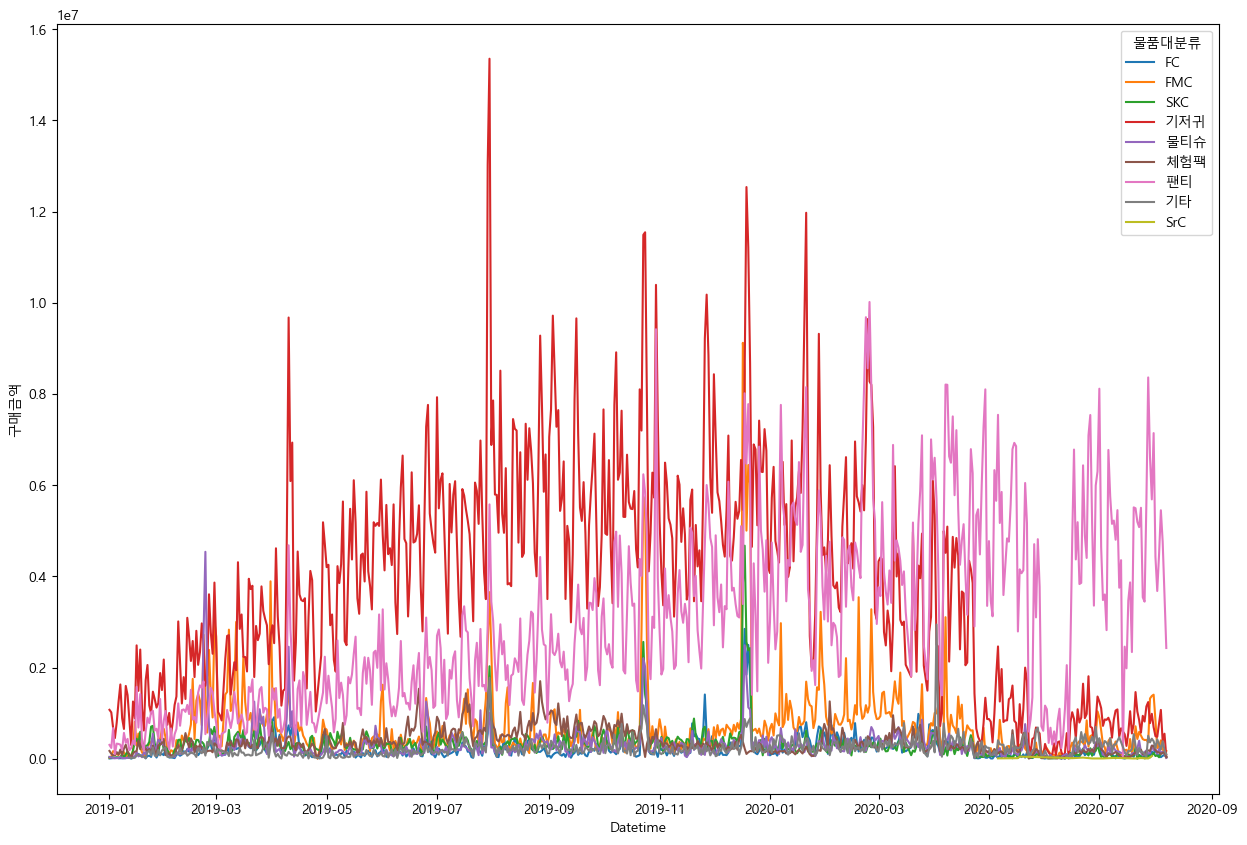

In [193]:
sns.lineplot(data =p2, x= 'Datetime', y = '구매금액', hue = '물품대분류')
plt.show()

# ARIMA모델

In [194]:
df_time = pd.pivot_table(data = df4, index = 'Datetime', values= '구매금액', aggfunc='sum')
df_time.head()
# index Datetime

구매금액
Datetime           
2019-01-01  1644770
2019-01-02  1435300
2019-01-03  1658040
2019-01-04   824210
2019-01-05  1429550

In [195]:
y = df_time['구매금액'].resample('1D').mean()
y.isnull().sum()

4

In [196]:
y1 = y.fillna(method='bfill') # 결측값 대체

In [197]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
# 이쁘게 볼라고 사용

C:\Users\DMCCONET\anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py:338: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.tight_layout()
C:\Users\DMCCONET\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


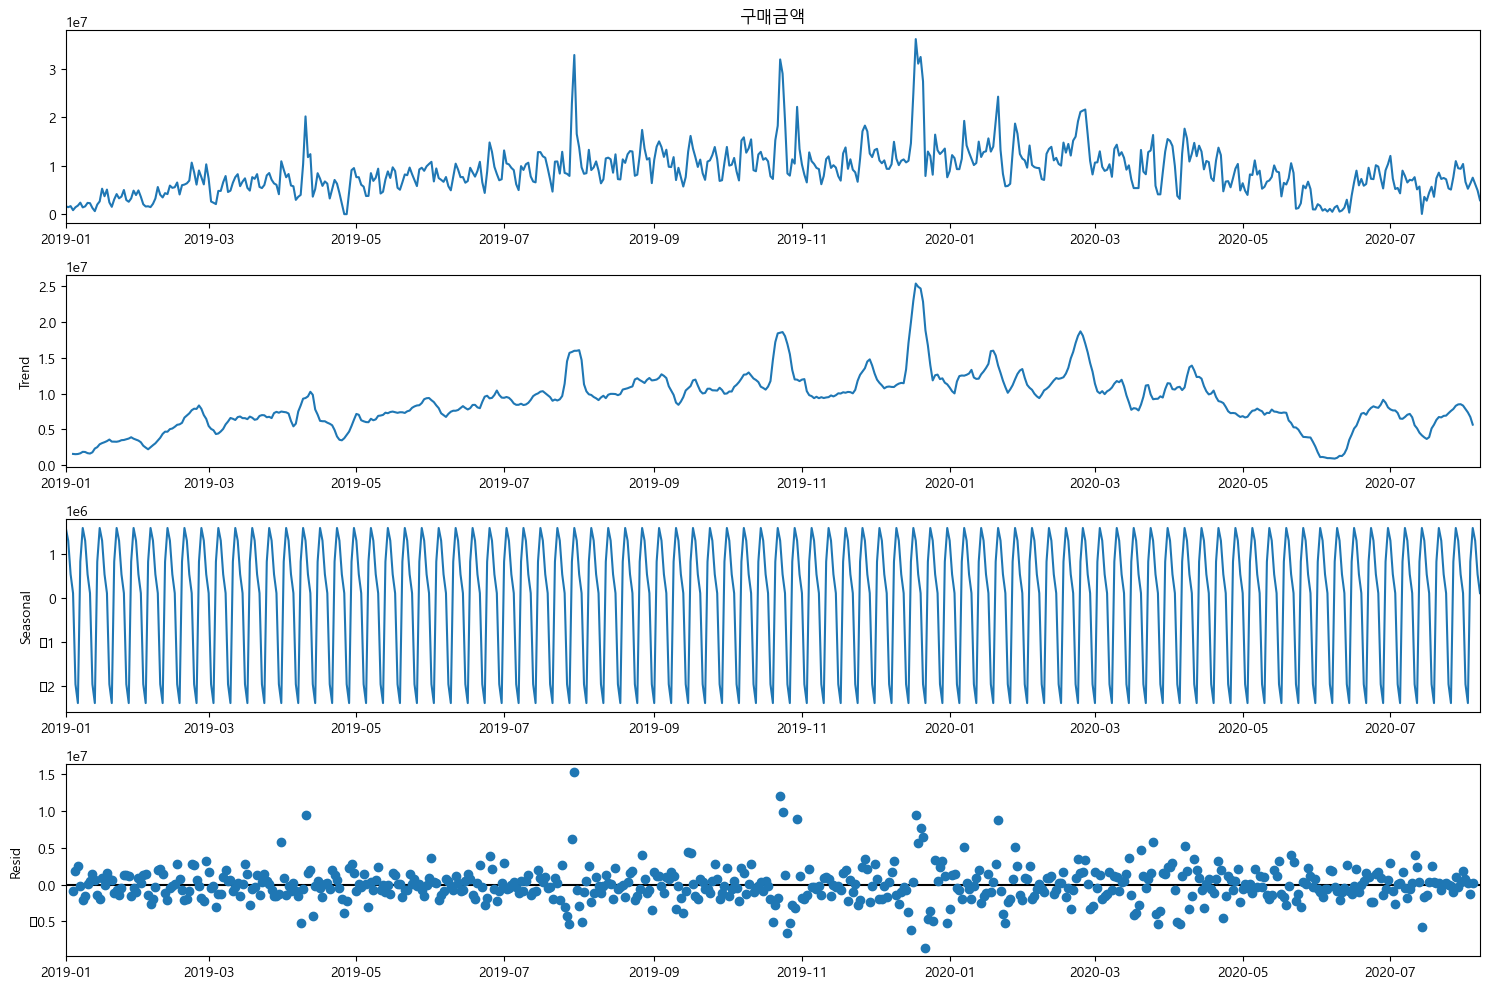

In [198]:
# 시계열 모델 생성
model_series = tsa.seasonal_decompose(y1,model='additive')
# 모델 시각화
fig = model_series.plot()
plt.show()


In [199]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [200]:
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [201]:
param_list = []
param_seasonal_list = []
results_AIC_list = []

In [202]:
for param in pdq:
     for param_seasonal in seasonal_pdq:
        try:
            mod = tsa.statespace.SARIMAX(y1,order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
             continue

ARIMA_list = pd.DataFrame({'Parameter':param_list,'Seasonal':param_seasonal_list,'AIC':results_AIC_list})
ARIMA_list.sort_values(by='AIC')
#AIC : 값이 낮을 수록 모형 적합도가 높은것을 의미함

Parameter       Seasonal           AIC
43  (1, 0, 1)  (0, 1, 1, 12)  18406.703699
47  (1, 0, 1)  (1, 1, 1, 12)  18408.328686
23  (0, 1, 0)  (1, 1, 1, 12)  18429.699892
59  (1, 1, 1)  (0, 1, 1, 12)  18433.805084
63  (1, 1, 1)  (1, 1, 1, 12)  18434.315159
..        ...            ...           ...
9   (0, 0, 1)  (0, 0, 1, 12)  19584.039434
12  (0, 0, 1)  (1, 0, 0, 12)  19597.840336
1   (0, 0, 0)  (0, 0, 1, 12)  19844.243235
8   (0, 0, 1)  (0, 0, 0, 12)  20063.825526
0   (0, 0, 0)  (0, 0, 0, 12)  20504.068647

[64 rows x 3 columns]

In [203]:
# AIC가 낮은 Parameter =(1,1,1) 모델로 구성
mod = tsa.statespace.SARIMAX(y1,order=(1, 1, 1),seasonal_order=(0, 1, 1, 12),
                              enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               구매금액   No. Observations:                  585
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -9212.903
Date:                            Wed, 18 Jan 2023   AIC                          18433.805
Time:                                    21:22:53   BIC                          18451.103
Sample:                                01-01-2019   HQIC                         18440.560
                                     - 08-07-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6047      0.073      8.243      0.000       0.461       0.748
ma.L1         -0.9227      0.049   

C:\Users\DMCCONET\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


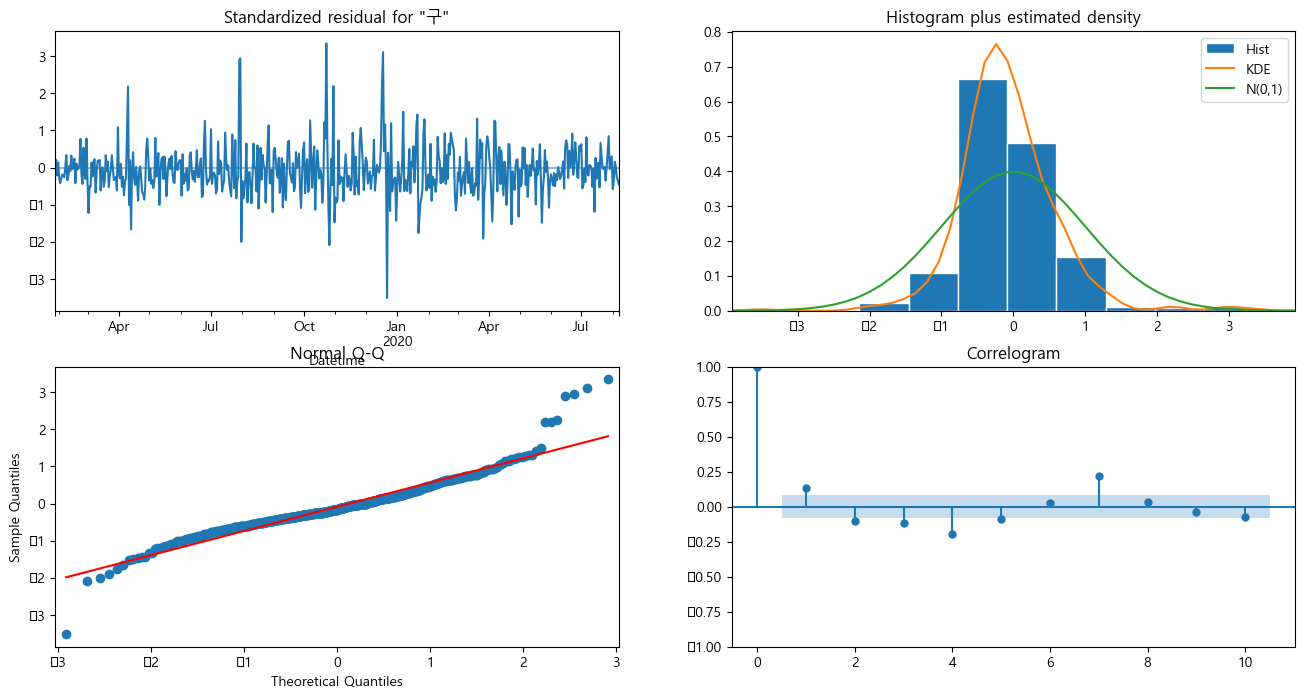

In [204]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [205]:
results.get_prediction()
y1.head()

Datetime
2019-01-01    1644770.0
2019-01-02    1435300.0
2019-01-03    1658040.0
2019-01-04     824210.0
2019-01-05    1429550.0
Freq: D, Name: 구매금액, dtype: float64

C:\Users\DMCCONET\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


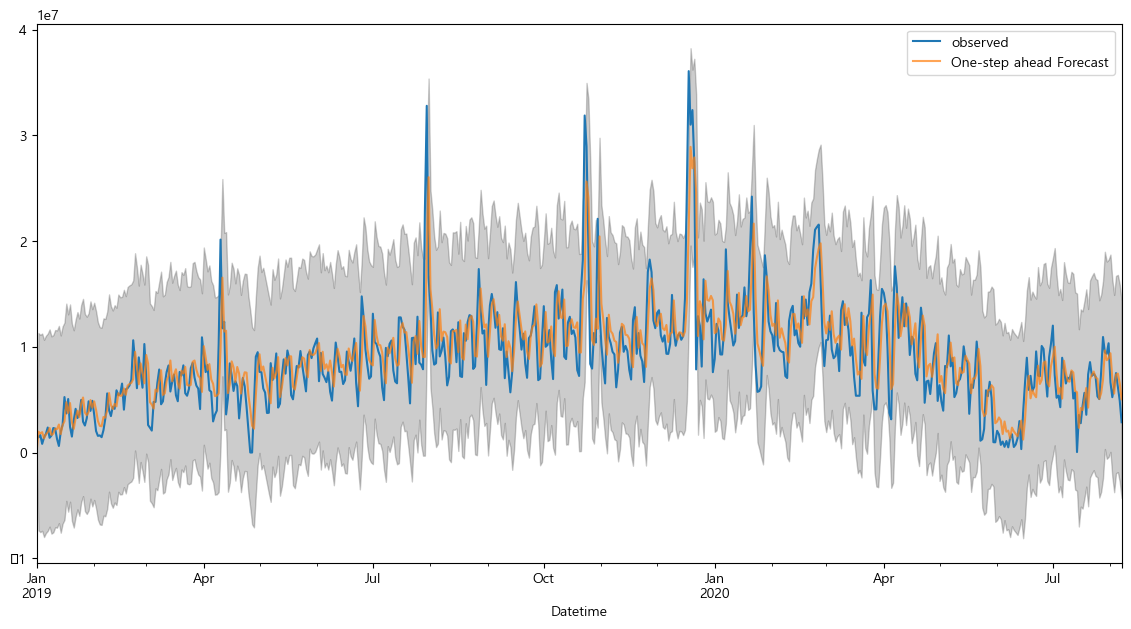

In [206]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y1.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.legend()
plt.show()

In [207]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pd.DataFrame(pred.predicted_mean).reset_index()

Datetime  predicted_mean
0   2019-01-01    0.000000e+00
1   2019-01-02    1.976295e+06
2   2019-01-03    1.807814e+06
3   2019-01-04    1.930926e+06
4   2019-01-05    1.341173e+06
..         ...             ...
580 2020-08-03    5.580462e+06
581 2020-08-04    7.385296e+06
582 2020-08-05    7.474884e+06
583 2020-08-06    6.559261e+06
584 2020-08-07    5.045945e+06

[585 rows x 2 columns]

In [208]:
y_forecasted = pred.predicted_mean
y_truth = y['2019-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))

MSE 9414407650155.11


C:\Users\DMCCONET\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


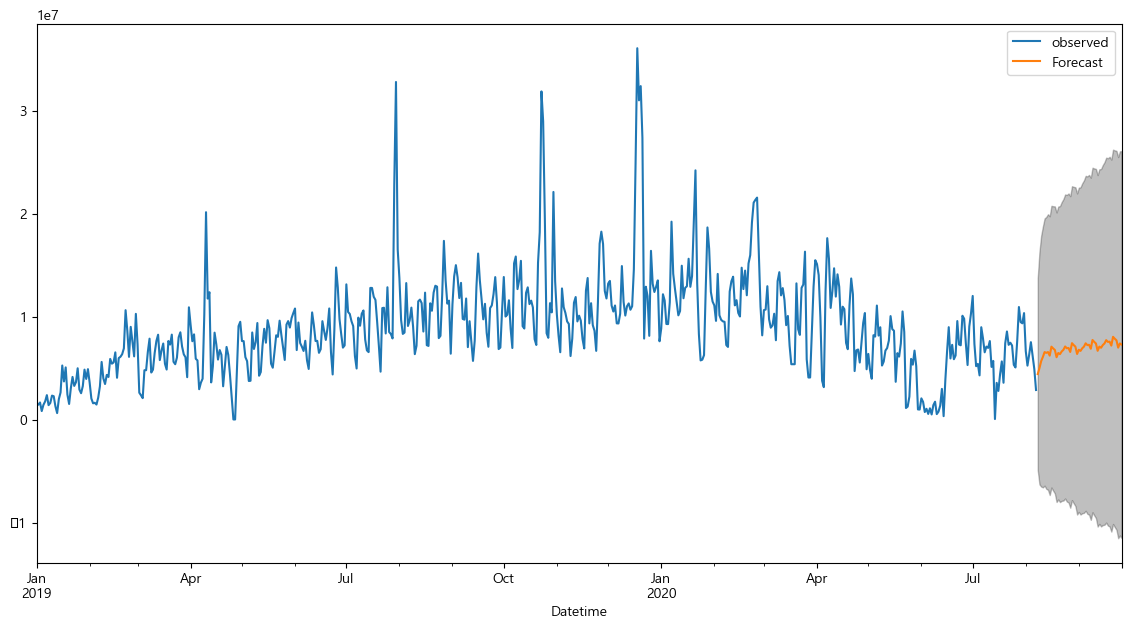

In [219]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int() #추정된 계수의 신뢰구간 계산
ax = y1.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.legend()
plt.show()

In [214]:
pred_ci['구매금액예측'] = (pred_ci['lower 구매금액'] + pred_ci['upper 구매금액']) / 2
pred_ci

lower 구매금액    upper 구매금액        구매금액예측
2020-08-08 -4.909301e+06  1.374403e+07  4.417364e+06
2020-08-09 -6.292829e+06  1.628544e+07  4.996304e+06
2020-08-10 -6.508112e+06  1.784785e+07  5.669867e+06
2020-08-11 -6.585409e+06  1.874692e+07  6.080755e+06
2020-08-12 -6.422457e+06  1.953309e+07  6.555315e+06
...                  ...           ...           ...
2023-04-30 -1.172963e+08  1.799546e+08  3.132916e+07
2023-05-01 -1.170668e+08  1.805405e+08  3.173688e+07
2023-05-02 -1.173501e+08  1.806032e+08  3.162655e+07
2023-05-03 -1.172632e+08  1.810298e+08  3.188331e+07
2023-05-04 -1.172723e+08  1.813566e+08  3.204217e+07

[1000 rows x 3 columns]

In [215]:
t = pred_ci.reset_index()
t['Datetime'] = pd.to_datetime(t['index'])
t['Year']= t['index'].dt.year
t['Month']= t['index'].dt.month
t['Day']= t['index'].dt.day
t['day_of_week']= t['index'].dt.day_name()
t2 = (t['Year'] == 2021)
#2021년 구매금액 예측
tt = t.loc[t2]
#2021년 구매금액 예측
pd.pivot_table(data=tt, index='Month', values='구매금액예측', aggfunc='sum')

구매금액예측
Month              
1      3.263966e+08
2      3.150639e+08
3      3.724823e+08
4      3.839993e+08
5      4.219210e+08
6      4.303418e+08
7      4.709196e+08
8      4.936755e+08
9      5.029559e+08
10     5.422071e+08
11     5.492370e+08
12     5.914742e+08

# 기저귀 시계열분석

In [13]:
import statsmodels.tsa.api as tsa

In [14]:
df3['물품대분류']

0         더블하트
1           팬티
2          FMC
3          기저귀
4          기저귀
          ... 
199994     FMC
199995     체험팩
199996     체험팩
199997     체험팩
199998      기타
Name: 물품대분류, Length: 199999, dtype: object

In [15]:
cond2 = (df3['물품대분류'] == '기저귀')
df5 = df3.loc[cond2]

In [16]:
df5

주문번호         구매일       배송시작일       배송완료일  \
3                  201905132367003  2019-05-13  2019-05-14  2019-05-16   
4                  201905092356247  2019-05-10  2019-05-11  2019-05-13   
5                  201907282649358  2019-07-29  2019-07-30  2019-08-02   
11                 201908082705259  2019-08-09  2019-08-10  2019-08-12   
16                 201906242522007  2019-06-25  2019-06-26  2019-06-28   
...                            ...         ...         ...         ...   
199968  20200621102552-20845557425  2020-06-21  2020-06-22  2020-06-24   
199969  20200621102552-20845557425  2020-06-21  2020-06-22  2020-06-24   
199971  20200625123805-45572462388  2020-06-25  2020-06-26  2020-06-28   
199982  20200627233510-33942274635  2020-06-28  2020-06-29  2020-07-01   
199990  20200708231905-73449246312  2020-07-09  2020-07-10  2020-07-12   

        구매시월령(수정)                  고객번호    구매금액   결제금액 물품대분류  \
3            66.0       201812310749771   59520  47922   기저귀   
4             5.0       201812310749774   50640  39788   기저귀   
5             8.0       201812310749774  101280  76744   기저귀   
11            NaN       201812310749783   52320  43689   기저귀   
16            5.0       201812310749784   50640  37209   기저귀   
...           ...                   ...     ...    ...   ...   
199968        5.0  20200614141532175234   43400  21852   기저귀   
199969        5.0  20200614141532175234   49900  38002   기저귀   
199971        1.0  20200617223902505156   43400  24466   기저귀   
199982        5.0  20200627231604996693   49900  33072   기저귀   
199990        6.0  20200708231025349606   49900  28102   기저귀   

                                             상품명  
3                 하기스 네이처메이드 밤부 3단계 여아 144매(밴드형)  
4                하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형)  
5       [2019년형] 하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형)  
11                   하기스 네이처메이드 3단계 남아 132매(밴드형)  
16      [2019년형] 하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형)  
...                                          ...  
199968            NEW 하기스 맥스드라이 3단계 공용 132매(밴드형)  
199969        하기스 NEW 네이처메이드 썸머 3단계 공용 120매(밴드형)  
199971            NEW 하기스 맥스드라이 2단계 공용 156매(밴드형)  
199982        하기스 NEW 네이처메이드 썸머 3단계 공용 120매(밴드형)  
199990        하기스 NEW 네이처메이드 썸머 3단계 공용 120매(밴드형)  

[35404 rows x 10 columns]

In [17]:
df5['Datetime'] = pd.to_datetime(df5['구매일'])
df5['Year']= df5['Datetime'].dt.year
df5['Month']= df5['Datetime'].dt.month
df5['Day']= df5['Datetime'].dt.day
df5['day_of_week']= df5['Datetime'].dt.day_name()

C:\Users\DMCCONET\AppData\Local\Temp\ipykernel_16836\3174081411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Datetime'] = pd.to_datetime(df5['구매일'])
C:\Users\DMCCONET\AppData\Local\Temp\ipykernel_16836\3174081411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Year']= df5['Datetime'].dt.year
C:\Users\DMCCONET\AppData\Local\Temp\ipykernel_16836\3174081411.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [23]:
p2 = pd.pivot_table(data = df5,
                   index = 'Datetime',
                   values = '구매금액', aggfunc ='sum').reset_index()
p2

Datetime     구매금액
0   2019-01-01  1072520
1   2019-01-02  1016400
2   2019-01-03   682560
3   2019-01-04   453320
4   2019-01-05   796040
..         ...      ...
573 2020-08-03   773900
574 2020-08-04  1070500
575 2020-08-05   381100
576 2020-08-06   548000
577 2020-08-07    43400

[578 rows x 2 columns]

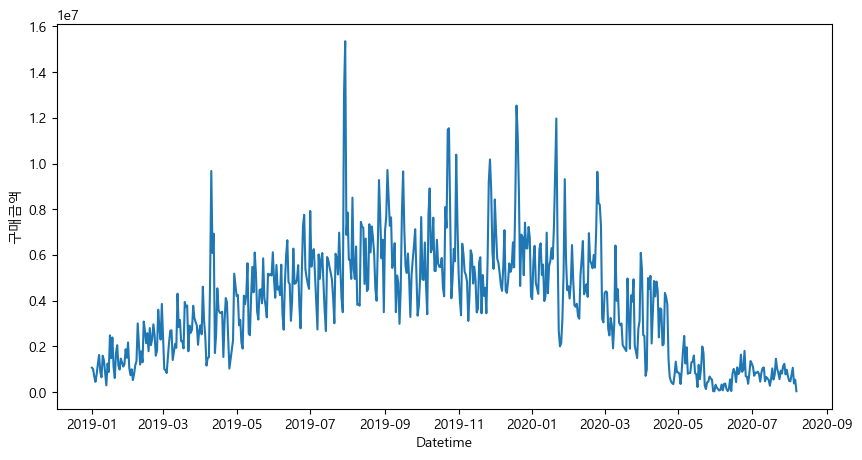

In [19]:
plt.figure(figsize= [10,5])
sns.lineplot(data =p2, x= 'Datetime', y = '구매금액', ci=None , estimator=sum)
plt.show()

# ARIMA 모델

In [20]:
import statsmodels.tsa.api as tsa

In [47]:
df_time = pd.pivot_table(data = p2, index = 'Datetime', values= '구매금액', aggfunc='sum')
df_time.head()
# index Datetime

구매금액
Datetime           
2019-01-01  1072520
2019-01-02  1016400
2019-01-03   682560
2019-01-04   453320
2019-01-05   796040

In [60]:
y = df_time['구매금액'].resample('1D').mean()

In [61]:
y.isnull().sum()

7

In [62]:
y1 = y.fillna(method='bfill') # 결측값 없어서 대체 안함

In [75]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
# 이쁘게 볼라고 사용

C:\Users\DMCCONET\anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py:338: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.tight_layout()
C:\Users\DMCCONET\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


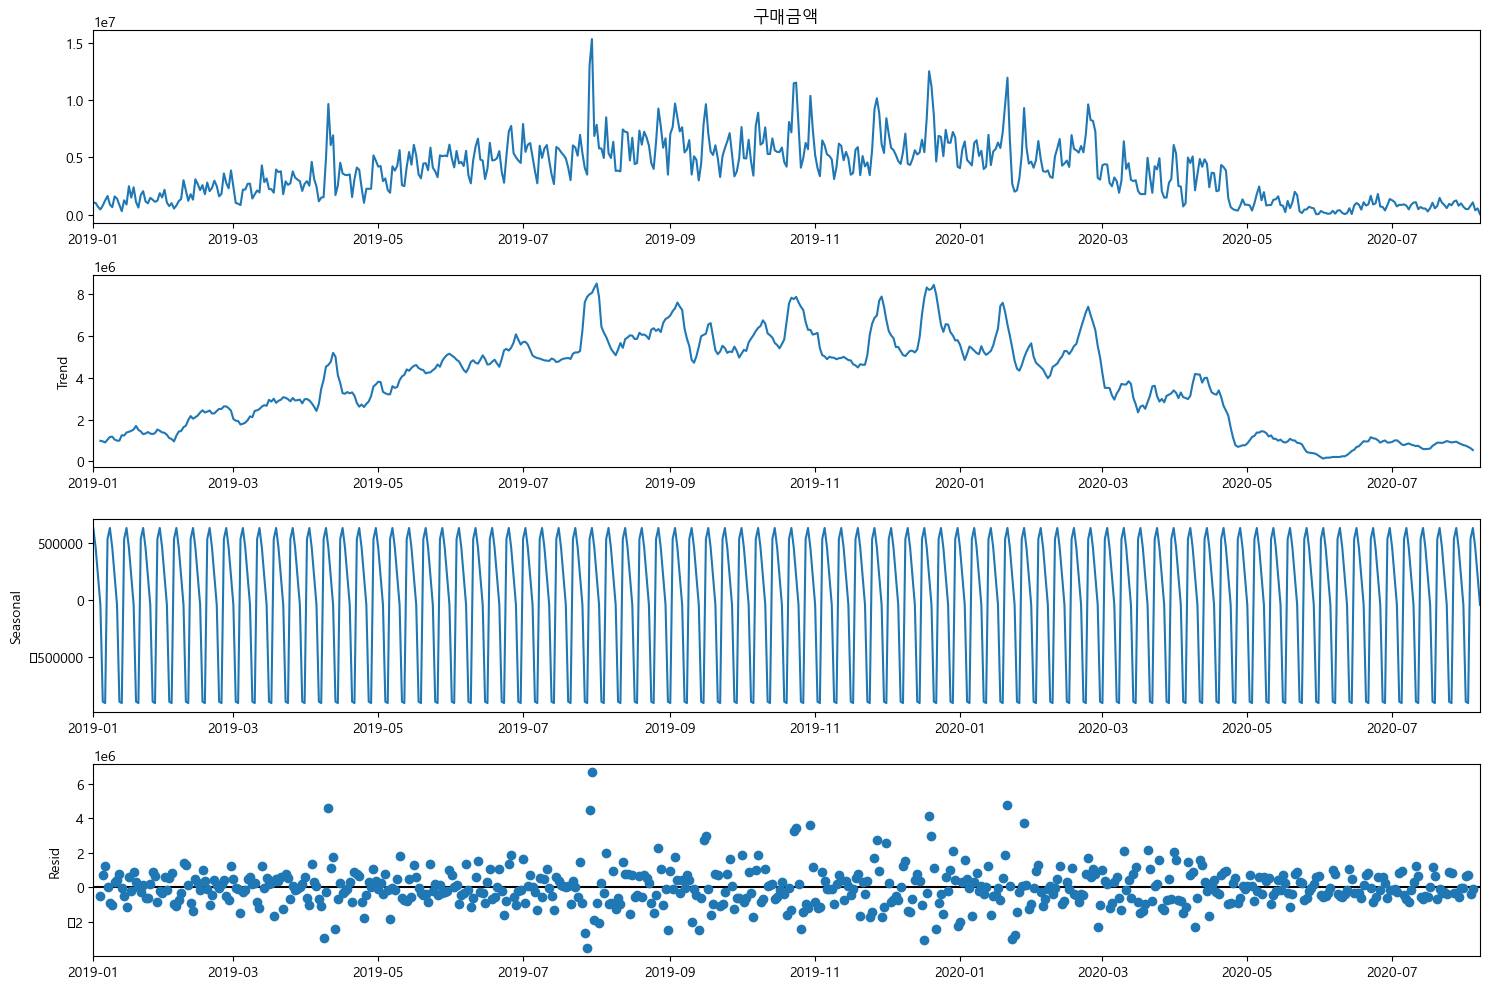

In [76]:
# 시계열 모델 생성
model_series = tsa.seasonal_decompose(y1,model='additive')
# 모델 시각화
fig = model_series.plot()
plt.show()

In [64]:
import itertools

In [65]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [66]:
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [67]:
param_list = []
param_seasonal_list = []
results_AIC_list = []

In [68]:
for param in pdq:
     for param_seasonal in seasonal_pdq:
        try:
            mod = tsa.statespace.SARIMAX(y1,order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
             continue

ARIMA_list = pd.DataFrame({'Parameter':param_list,'Seasonal':param_seasonal_list,'AIC':results_AIC_list})
ARIMA_list.sort_values(by='AIC')
#AIC : 값이 낮을 수록 모형 적합도가 높은것을 의미함

Parameter       Seasonal           AIC
47  (1, 0, 1)  (1, 1, 1, 12)  17565.522553
43  (1, 0, 1)  (0, 1, 1, 12)  17566.604769
63  (1, 1, 1)  (1, 1, 1, 12)  17573.074536
59  (1, 1, 1)  (0, 1, 1, 12)  17573.913653
15  (0, 0, 1)  (1, 1, 1, 12)  17590.085150
..        ...            ...           ...
9   (0, 0, 1)  (0, 0, 1, 12)  18692.594468
12  (0, 0, 1)  (1, 0, 0, 12)  18695.769928
1   (0, 0, 0)  (0, 0, 1, 12)  18917.500530
8   (0, 0, 1)  (0, 0, 0, 12)  19148.812385
0   (0, 0, 0)  (0, 0, 0, 12)  19574.534075

[64 rows x 3 columns]

In [73]:
# AIC가 낮은 Parameter =(1,1,1) 모델로 구성
mod = tsa.statespace.SARIMAX(y1,order=(1, 0, 1),seasonal_order=(0, 1, 1, 12),
                              enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary())
#seasonal_order=(1, 1, 1, 12)가 ma.S.L12 pvalue 가 높게 나와서 0,1,1,12로 함

                                     SARIMAX Results                                      
Dep. Variable:                               구매금액   No. Observations:                  585
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood               -8779.302
Date:                            Wed, 18 Jan 2023   AIC                          17566.605
Time:                                    19:46:05   BIC                          17583.909
Sample:                                01-01-2019   HQIC                         17573.362
                                     - 08-07-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5665      0.073      7.766      0.000       0.424       0.709
ma.L1          0.1676      0.084   

C:\Users\DMCCONET\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


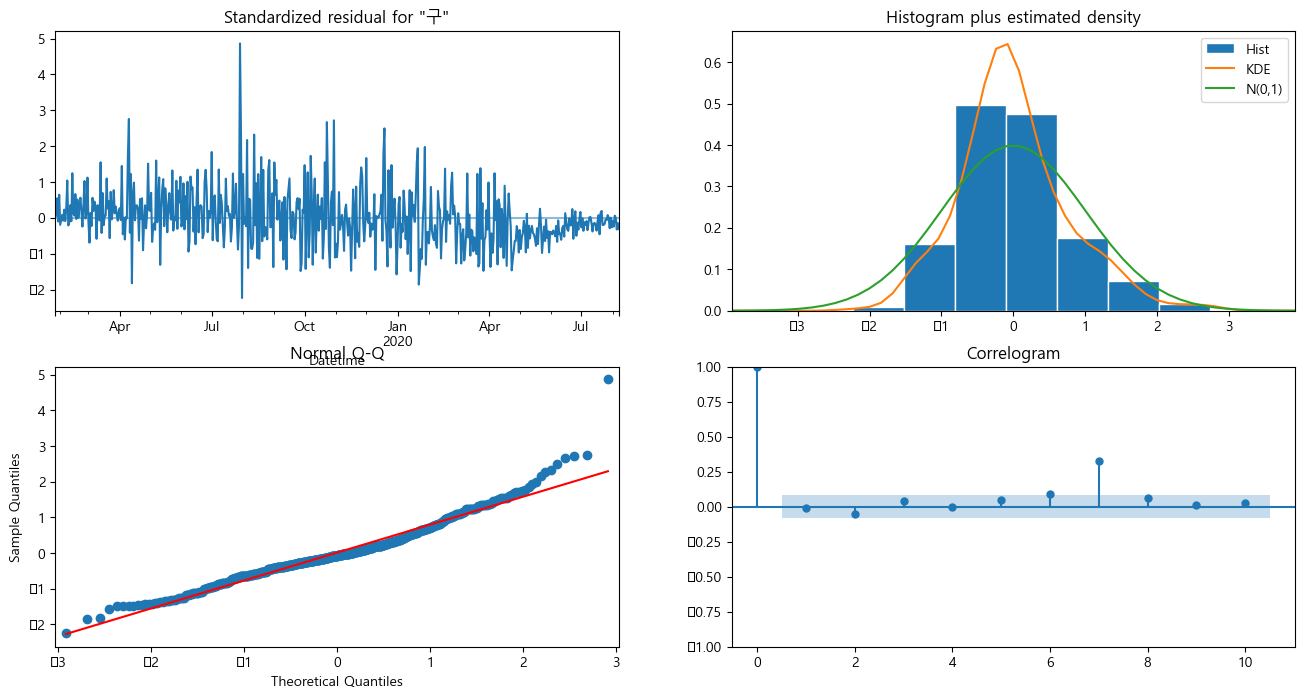

In [74]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [77]:
results.get_prediction()
y1.head()

Datetime
2019-01-01    1072520.0
2019-01-02    1016400.0
2019-01-03     682560.0
2019-01-04     453320.0
2019-01-05     796040.0
Freq: D, Name: 구매금액, dtype: float64

C:\Users\DMCCONET\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


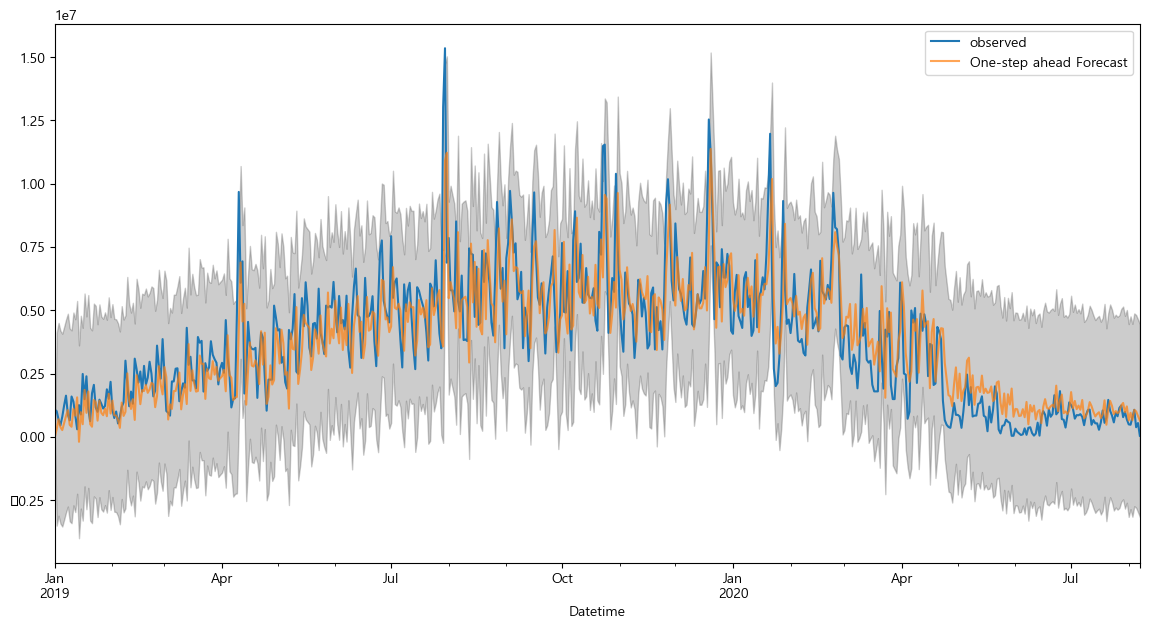

In [78]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y1.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.legend()
plt.show()

In [79]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pd.DataFrame(pred.predicted_mean).reset_index()

Datetime  predicted_mean
0   2019-01-01    0.000000e+00
1   2019-01-02    3.037945e+05
2   2019-01-03    6.952601e+05
3   2019-01-04    3.845452e+05
4   2019-01-05    2.683381e+05
..         ...             ...
580 2020-08-03    6.551920e+05
581 2020-08-04    1.069709e+06
582 2020-08-05    1.007454e+06
583 2020-08-06    8.324474e+05
584 2020-08-07    6.491979e+05

[585 rows x 2 columns]

In [80]:
y_forecasted = pred.predicted_mean
y_truth = y['2019-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))

MSE 2257762603887.15


C:\Users\DMCCONET\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


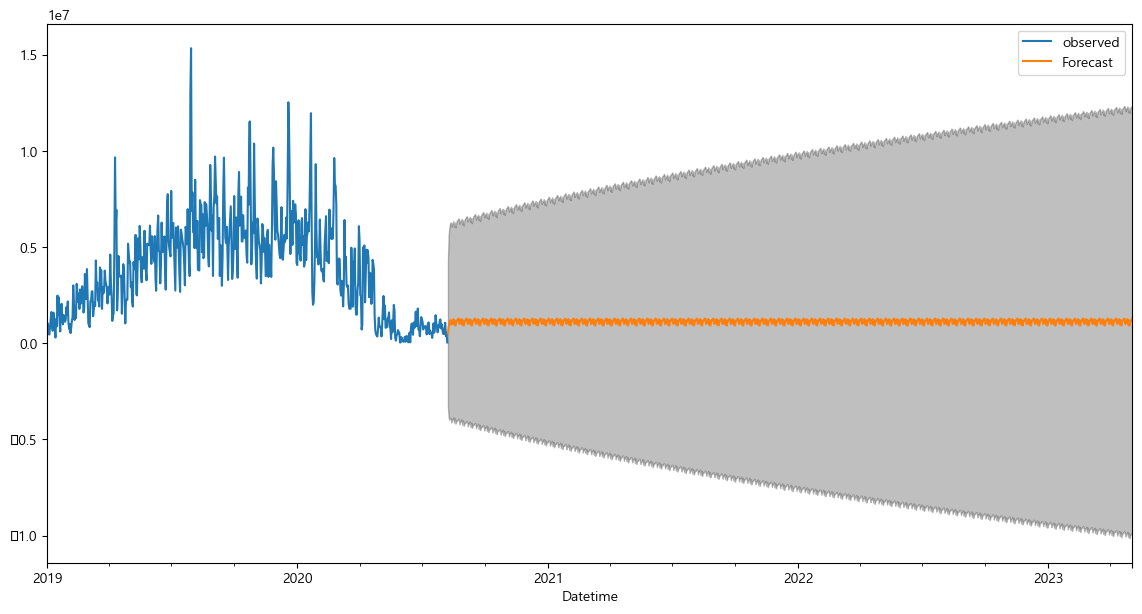

In [84]:
pred_uc = results.get_forecast(steps=1000)
pred_ci = pred_uc.conf_int() #추정된 계수의 신뢰구간 계산
ax = y1.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.25)

plt.legend()
plt.show()

In [104]:
pred_ci['구매금액예측'] = (pred_ci['lower 구매금액'] + pred_ci['upper 구매금액']) / 2
pred_ci

lower 구매금액    upper 구매금액        구매금액예측
2020-08-08 -3.300597e+06  4.316121e+06  5.077622e+05
2020-08-09 -3.861205e+06  5.587748e+06  8.632712e+05
2020-08-10 -3.976148e+06  5.989675e+06  1.006764e+06
2020-08-11 -3.883525e+06  6.242585e+06  1.179530e+06
2020-08-12 -3.883331e+06  6.293685e+06  1.205177e+06
...                  ...           ...           ...
2023-04-30 -1.014052e+07  1.198841e+07  9.239481e+05
2023-05-01 -1.000746e+07  1.218065e+07  1.086595e+06
2023-05-02 -9.918772e+06  1.230114e+07  1.191183e+06
2023-05-03 -9.922526e+06  1.230758e+07  1.192528e+06
2023-05-04 -9.831923e+06  1.240146e+07  1.284767e+06

[1000 rows x 3 columns]

In [119]:

t = pred_ci.reset_index()
t

index    lower 구매금액    upper 구매금액        구매금액예측
0   2020-08-08 -3.300597e+06  4.316121e+06  5.077622e+05
1   2020-08-09 -3.861205e+06  5.587748e+06  8.632712e+05
2   2020-08-10 -3.976148e+06  5.989675e+06  1.006764e+06
3   2020-08-11 -3.883525e+06  6.242585e+06  1.179530e+06
4   2020-08-12 -3.883331e+06  6.293685e+06  1.205177e+06
..         ...           ...           ...           ...
995 2023-04-30 -1.014052e+07  1.198841e+07  9.239481e+05
996 2023-05-01 -1.000746e+07  1.218065e+07  1.086595e+06
997 2023-05-02 -9.918772e+06  1.230114e+07  1.191183e+06
998 2023-05-03 -9.922526e+06  1.230758e+07  1.192528e+06
999 2023-05-04 -9.831923e+06  1.240146e+07  1.284767e+06

[1000 rows x 4 columns]

In [120]:
t['index']

0     2020-08-08
1     2020-08-09
2     2020-08-10
3     2020-08-11
4     2020-08-12
         ...    
995   2023-04-30
996   2023-05-01
997   2023-05-02
998   2023-05-03
999   2023-05-04
Name: index, Length: 1000, dtype: datetime64[ns]

In [121]:
t['Datetime'] = pd.to_datetime(t['index'])
t['Year']= t['index'].dt.year
t['Month']= t['index'].dt.month
t['Day']= t['index'].dt.day
t['day_of_week']= t['index'].dt.day_name()

In [147]:
t2 = (t['Year'] == 2021)
t2.unique()

array([False,  True])

In [148]:
tt = t.loc[t2]
tt

index    lower 구매금액    upper 구매금액        구매금액예측   Datetime  Year  \
146 2021-01-01 -5.138296e+06  7.523352e+06  1.192528e+06 2021-01-01  2021   
147 2021-01-02 -5.048929e+06  7.618462e+06  1.284767e+06 2021-01-02  2021   
148 2021-01-03 -5.069823e+06  7.599411e+06  1.264794e+06 2021-01-03  2021   
149 2021-01-04 -5.326258e+06  7.343567e+06  1.008655e+06 2021-01-04  2021   
150 2021-01-05 -5.171643e+06  7.498372e+06  1.163364e+06 2021-01-05  2021   
..         ...           ...           ...           ...        ...   ...   
506 2021-12-27 -7.487695e+06  9.872751e+06  1.192528e+06 2021-12-27  2021   
507 2021-12-28 -7.397551e+06  9.967084e+06  1.284767e+06 2021-12-28  2021   
508 2021-12-29 -7.418196e+06  9.947784e+06  1.264794e+06 2021-12-29  2021   
509 2021-12-30 -7.674551e+06  9.691860e+06  1.008655e+06 2021-12-30  2021   
510 2021-12-31 -7.519911e+06  9.846639e+06  1.163364e+06 2021-12-31  2021   

     Month  Day day_of_week  
146      1    1      Friday  
147      1    2    Saturday  
148      1    3      Sunday  
149      1    4      Monday  
150      1    5     Tuesday  
..     ...  ...         ...  
506     12   27      Monday  
507     12   28     Tuesday  
508     12   29   Wednesday  
509     12   30    Thursday  
510     12   31      Friday  

[365 rows x 9 columns]

In [149]:
#2021년 기저귀 월별 구매금액 예측
pd.pivot_table(data=tt, index='Month', values='구매금액예측', aggfunc='sum')

구매금액예측
Month              
1      3.564966e+07
2      3.153334e+07
3      3.558493e+07
4      3.398044e+07
5      3.564966e+07
6      3.391705e+07
7      3.543654e+07
8      3.548720e+07
9      3.408070e+07
10     3.530214e+07
11     3.399599e+07
12     3.554156e+07